In [1]:
# import sys
# !{sys.executable} -m pip install pycountry_convert

## **IDS560 : Stress, Anxiety and Depression Prediction**

## **About Dataset**

The DASS is a 42-item self-administered questionnaire designed to measure the magnitude of three negative emotional states: depression, anxiety, and stress. The DASSDepression focuses on reports of low mood, motivation, and self-esteem, DASS-anxiety on physiological arousal, perceived panic, and fear, and DASS-stress on tension and irritability. Instructions to client and scoring: A respondent indicates on a 4-point scale the extent to which each of 42 statements applied over the past week. A printed overlay is used to obtain total scores for each subscale. Higher scores on each subscale indicate increasing severity of depression, anxiety, or stress

The DASS has 3 parts
+ 0 - 14 : Depression
+ 15 - 28 : Anxiety
+ 29 - 42 : Stress

And these three parts were evaluated in 3 parts also;

- Physical Symptoms
- Mental Symptoms
- Total Score

## **Data and Dependencies**

In [2]:
# Starter Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# For imputing missing values
from sklearn.impute import KNNImputer

# To convert country codes to alpha 3
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3

# Display options
pd.options.display.max_rows = 200
pd.options.display.max_columns = None

# Plot style
plt.style.use("fivethirtyeight")

In [3]:
# Data Load

dataframe = pd.read_csv('data.csv', delimiter = '\t')

In [4]:
# Check data head

dataframe.head()

Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  Q4I   Q4E  Q5A  Q5I  \
0    4   28  3890    4   25  2122    2   16  1944    4    8  2044    4   34   
1    4    2  8118    1   36  2890    2   35  4777    3   28  3090    4   10   
2    3    7  5784    1   33  4373    4   41  3242    1   13  6470    4   11   
3    2   23  5081    3   11  6837    2   37  5521    1   27  4556    3   28   
4    2   36  3215    2   13  7731    3    5  4156    4   10  2802    4    2   

    Q5E  Q6A  Q6I   Q6E  Q7A  Q7I   Q7E  Q8A  Q8I   Q8E  Q9A  Q9I   Q9E  Q10A  \
0  2153    4   33  2416    4   10  2818    4   13  2259    2   21  5541     1   
1  5078    4   40  2790    3   18  3408    4    1  8342    3   37   916     2   
2  3927    3    9  3704    1   17  4550    3    5  3021    2   32  5864     4   
3  3269    3   26  3231    4    2  7138    2   19  3079    3   31  9650     3   
4  5628    2    9  6522    4   34  2374    4   11  3054    4    7  2975     3   

   Q10I  Q10E  Q11A  Q11I  Q11E  Q12A  Q12I  Q12E  Q13A  Q13I  Q13E  Q14A  \
0    38  4441     4    31  2451     4    24  3325     4    14  1416     4   
1    32  1537     2    21  3926     2    25  3691     4    26  2004     4   
2    21  3722     2    10  3424     1    36  3236     4    23  2489     1   
3    17  4179     2     5  5928     1    21  2838     1    20  2560     4   
4    14  3524     2    33  3033     4    23  2132     4    17  1314     4   

   Q14I  Q14E  Q15A  Q15I  Q15E  Q16A  Q16I  Q16E  Q17A  Q17I  Q17E  Q18A  \
0    37  5021     4    27  2342     4    39  2480     3     6  2476     4   
1     4  8888     3    27  4109     3    19  4058     4    12  3692     2   
2    34  7290     4    12  6587     4    22  3627     4    38  2905     2   
3    29  5139     2    22  3597     2    35  3336     3    10  4506     1   
4    16  3181     4    26  2249     3    19  2623     4    35  3093     4   

   Q18I  Q18E  Q19A  Q19I   Q19E  Q20A  Q20I  Q20E  Q21A  Q21I  Q21E  Q22A  \
0    35  1627     3    17   9050     3    30  7001     1    11  4719     4   
1     6  3373     1    23   6015     1    16  3023     2    22  2670     3   
2    18  2998     2     8  10233     1    16  4258     4    28  2888     3   
3    14  2695     1    25   8128     2    15  3125     1     6  4061     1   
4    38  7098     4    37   1938     4    15  3502     3    32  4776     3   

   Q22I   Q22E  Q23A  Q23I   Q23E  Q24A  Q24I  Q24E  Q25A  Q25I   Q25E  Q26A  \
0    20   2984     4    36   1313     4    42  2444     4     1   9880     4   
1     3   5727     1    39   3641     2    33  2670     2     7   7649     3   
2     4  59592     2     3  11732     4     2  8834     2    29   7358     1   
3    40   4272     1    12   4029     1     9  5630     1    18  30631     2   
4    18   4463     4     4   2436     2    40  4047     4    31   3787     4   

   Q26I  Q26E  Q27A  Q27I   Q27E  Q28A  Q28I  Q28E  Q29A  Q29I  Q29E  Q30A  \
0     2  4695     4     5   1677     3     4  6723     4     3  5953     2   
1    11  2537     3     5   2907     4     9  1685     3    41  4726     3   
2    30  4928     2    15   3036     1    19  4127     2    37  3934     2   
3    24  9870     4     4   2411     1    16  9478     3     1  7618     3   
4    42  2102     2     1  12351     4     3  2410     2    22  5056     4   

   Q30I   Q30E  Q31A  Q31I  Q31E  Q32A  Q32I  Q32E  Q33A  Q33I  Q33E  Q34A  \
0    26   8062     4    12  5560     4     7  3032     2    29  3316     3   
1    17   6063     2    20  3307     3    14  4995     3    38  2505     2   
2    26  10782     4     1  8273     3    39  3501     1    27  3824     4   
3    32  12639     3    34  5378     1    41  8923     2    38  2977     4   
4    39   3343     3    27  3012     4    20  3520     4     8  1868     4   

   Q34I  Q34E  Q35A  Q35I   Q35E  Q36A  Q36I  Q36E  Q37A  Q37I  Q37E  Q38A  \
0    40  3563     4    23   5594     4    41  1477     1    18  3885     2   
1    34  2540     2    31   4359     3    15  3925     4    13  4609   

In [5]:
# Make a deep copy for backup

modelling = dataframe.copy(deep = True)

## **Data Preprocessing**

### **Filter and transform data**

In [6]:
# Function to preprocess the data

def preprocessor(df):
        
    df['gender'] = df['gender'].map({0 : 'Other', 1 : 'Male', 2 : 'Female', 3 : 'Other'})
    
    df['race'] = df['race'].map({10 : 'Asian', 20: 'Arab', 30 : 'Black', 40 : 'Indigenous Australian', 50 : 'Native American', 60 : 'White', 70 : 'Other'})
    
    df['religion'] = df['religion'].map({1 : 'Agnostic', 2 : 'Atheist', 3 : 'Buddhist', 4 : 'Christian (Catholic)', 
                                         5 : 'Christian (Mormon)', 6 : 'Christian (Protestant)', 7 : 'Christian (Other)', 
                                         8 : 'Hindu', 9 : 'Jewish', 10 : 'Muslim', 11 : 'Sikh' , 12 : 'Other'})
    
    df['orientation'] = df['orientation'].map({1 : 'Heterosexual', 2 : 'Bisexual', 3 : 'Homosexual', 4 : 'Asexual', 5 : 'Other'})
    
    df['married'] = df['married'].map({1 : 'Never married', 2 : 'Currently married', 3 : 'Previously married'})
    
    df['hand'] = df['hand'].map({1 : 'Right', 2 : 'Left', 3 : 'Both'})
    
    df['education'] = df['education'].map({1 : 'Less than high school', 2 : 'High school', 3 : 'University degree', 4 : 'Graduate degree'})
    
    df['voted'] = df['voted'].map({1 : 'Yes', 2 : 'No'})
        
    df['urban'] = df['urban'].map({1 : 'Rural (country side)', 2 : 'Suburban', 3 : 'Urban (town, city)'})
    
    df['engnat'] = df['engnat'].map({1 : 'Yes', 2 : 'No'})
    
    df['screensize'] = df['screensize'].map({1 : 'Small', 2 : 'Big'})
        
    return df

In [7]:
# Preprocess dataframe

dataframe = preprocessor(dataframe)

In [8]:
# Filter the dataframe to only age ranges from 16-24 years
dataframe = dataframe.loc[(dataframe['age'] >= 16) & (dataframe['age'] <= 24)]

# Remove any gender except Male and Female
dataframe = dataframe.loc[dataframe['gender'] != 'Other']

In [9]:
# Split male and female data

male_data = dataframe.loc[dataframe['gender'] == 'Male']
female_data = dataframe.loc[dataframe['gender'] == 'Female']

# Merge the dataframes to create a Female to Male 60:40 ratio

female_data = female_data.iloc[ : 7931, :]    # 60% undersample

dataframe = pd.concat([male_data, female_data], axis = 0)

# Free memory
del(male_data)
del(female_data)

# Check shape
dataframe.shape

(13218, 172)

In [10]:
# Calculating DASS scores
df = dataframe.copy() # taking a copy for backup
df.iloc[:,0:126]

# A - Question 1 to 42 are stored in A(eg:Q1A),timetaken in milliseconds to answer the qn is stored in E(Q1E) 
# and the question's position in the survey is stored in I(Q1I) 
# The questionnaire has three subscales(D,A,S) with 14 items in each subscale for the DASS 42 and the max score of 42 item is 126

questions = [i for i in df.iloc[:,0:126] if  'A' in i]
time = [i for i in df.iloc[:,0:126] if  'E' in i] # should be equal to testelapse
position = [i for i in df.iloc[:,0:126] if  'I' in i]

# save items in another dataframe
item_positions = df[position] 
dass = df[questions]
testelapse = df[time]

df.drop(position, axis=1, inplace=True)

In [11]:
# DASS score calculation
## Q2, Q4, Q7, Q15, Q19, Q23, Q25, Q41 questions are categorized as physical symptoms
# other questions are categorized as mental symptoms
##  _tot = totalqns, _physical_sym_qns = physical symptom, _mental_sym_qns = mental_symptom

df['depression_totalqns'] = np.sum(dass.iloc[:,0:14],axis=1)
df['depression_physical_sym_qns'] = np.sum(dass.loc[:,['Q2A','Q4A','Q7A']],axis=1)
df['depression_mental_sym_qns'] = df['depression_totalqns'] - df['depression_physical_sym_qns']
df['anxiety_totalqns'] = np.sum(dass.iloc[:,15:28],axis=1)
df['anxiety_physical_sym_qns'] = np.sum(dass.loc[:,['Q15A','Q19A','Q23A','Q25A']],axis=1)
df['anxiety_mental_sym_qns'] = df['anxiety_totalqns'] - df['anxiety_physical_sym_qns']
df['stress_totalqns'] = np.sum(dass.iloc[:,29:42],axis=1)
df['stress_physical_sym_qns'] = np.sum(dass.loc[:,['Q41A']],axis=1)
df['stress_mental_sym_qns'] = df['stress_totalqns'] - df['stress_physical_sym_qns']
df['total'] = np.sum(dass.iloc[:,0:42], axis=1)

In [12]:
# total time is not equal to testelapse.
df['testelapse'] = np.sum(df[time],axis=1) / 1000

In [13]:
# now drop time related features
df.drop(df[time],axis = 1, inplace = True)
df.drop(df[questions],axis = 1, inplace = True)

### **Ten item Personality Inventory(TIPI)**

The Ten-Item Personality Inventory (TIPI) is a brief assessment of the Big Five personality dimensions:
(1) Extraversion, (2) Agreeableness, (3) Conscientiousness, (4) Emotional Stability, and (5) Openness to Experience. 
Items are rated on a scale from 1, disagree strongly, to 7, agree strongly.

TIPI Scoring is done on the basis of this article: https://gosling.psy.utexas.edu/scales-weve-developed/ten-item-personality-measure-tipi/

Scoring the TIPI

1. Recode the reverse-scored items (i.e., recode a 7 with a 1, a 6 with a 2, a 5 with a 3, etc.). The reverse scored items are 2, 4, 6, 8, & 10.

2. Take the AVERAGE of the two items (the standard item and the recoded reverse-scored item) that make up each scale.

Example using the Extraversion scale: A participant has scores of 5 on item 1 (Extraverted, enthusiastic) and and 2 on item 6 (Reserved, quiet). First, recode the reverse-scored item (i.e., item 6), replacing the 2 with a 6. Second, take the average of the score for item 1 and the (recoded) score for item 6. So the TIPI Extraversion scale score would be: (5 + 6)/2 = 5.5

In [14]:
# TIPI
conversion = {1: 7,
              2: 6,
              3: 5,
              4: 4,
              5: 3,
              6: 2,
              7: 1}

# negative items are 2 ,4, 6, 8, 10
negative_items = ['TIPI2', 'TIPI4', 'TIPI6', 'TIPI8', 'TIPI10']

for x in negative_items:
    df[x] = df[x].map(conversion)
    
print(df.columns)

Index(['country', 'source', 'introelapse', 'testelapse', 'surveyelapse',
       'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6',
       'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14',
       'VCL15', 'VCL16', 'education', 'urban', 'gender', 'engnat', 'age',
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major',
       'depression_totalqns', 'depression_physical_sym_qns',
       'depression_mental_sym_qns', 'anxiety_totalqns',
       'anxiety_physical_sym_qns', 'anxiety_mental_sym_qns', 'stress_totalqns',
       'stress_physical_sym_qns', 'stress_mental_sym_qns', 'total'],
      dtype='object')


In [15]:
# TIPI

tipi = df[[i for i in df.columns if 'TIPI' in i]]

df['TIPI_extraversion'] = (df['TIPI1'] + df['TIPI6']) / 2
df['TIPI_agreeableness'] = (df['TIPI2'] + df['TIPI7']) / 2
df['TIPI_conscientiousness'] = (df['TIPI3'] + df['TIPI8']) / 2
df['TIPI_emotional_stability'] = (df['TIPI4'] + df['TIPI9']) / 2
df['TIPI_openness_exp'] = (df['TIPI5'] + df['TIPI10']) / 2

# Drop tipi
df.drop(tipi, axis = 1, inplace = True)

### **VCL**

A value of 1 is checked, 0 means unchecked. The words at VCL6, VCL9, and VCL12 are not real words and can be used as a validity check.

In [16]:
# VCL questions

VCL_questions = df[[i for i in df.columns if 'VCL' in i]]

# renaming VCL's with words
names = ['boat',
         'incoherent', 
         'pallid',
         'robot',
         'audible', 
         'reliability_q1', 
         'paucity',
         'epistemology',
         'reliability_q2',
         'decide',
         'pastiche',
         'reliability_q3',
         'abysmal',
         'lucid',
         'betray',
         'funny']

for x,y in enumerate(names):
    df.rename(columns = {'VCL'+str(x+1) : y}, inplace = True)


for x in names:
    df[x] = df[x].astype('object')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13218 entries, 8 to 16230
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      13217 non-null  object 
 1   source                       13218 non-null  int64  
 2   introelapse                  13218 non-null  int64  
 3   testelapse                   13218 non-null  float64
 4   surveyelapse                 13218 non-null  int64  
 5   boat                         13218 non-null  object 
 6   incoherent                   13218 non-null  object 
 7   pallid                       13218 non-null  object 
 8   robot                        13218 non-null  object 
 9   audible                      13218 non-null  object 
 10  reliability_q1               13218 non-null  object 
 11  paucity                      13218 non-null  object 
 12  epistemology                 13218 non-null  object 
 13  reliability_q2  

In [17]:
# Change categories to category / object type
categories = ['source', 'uniquenetworklocation', 'screensize', 'country',
              'major', 'familysize', 'married', 'voted', 'race',  'orientation', 'religion',
              'religion', 'hand', 'gender','engnat', 'urban', 'education']

for column in categories:
    df[column] = df[column].astype('object')

# Simplifying Major column to cluster everything similar and to replace nAn with OTHER

df['major'] = df['major'].str.lower()

### **Fixing 'major' column**

In [18]:
# Function for cleaning 'major' column
# 'NaN' values changed with 'other' value

def major_simplify(title):
    if 'business management' in str(title).lower():
        return 'management'
    elif 'information technology' in str(title).lower():
        return 'it'
    elif 'math' in str(title).lower():
        return 'mathematics'
    elif 'computer' in str(title).lower():
        return 'it'
    elif 'bio' in str(title).lower():
        return 'biology'
    elif 'tesl' in str(title).lower():
        return 'english'
    elif 'medic' in str(title).lower():
        return 'medicine'
    elif 'account' in str(title).lower():
        return 'accountacy'
    elif 'none' in str(title).lower():
        return np.nan
    elif 'nurs' in str(title).lower():
        return 'nursing'
    elif '-' in str(title).lower():
        return np.nan
    elif 'teach' in str(title).lower():
        return 'teaching'
    elif 'pharma' in str(title).lower():
        return 'pharmacy'
    elif 'no' in str(title).lower():
        return np.nan
    elif 'film' in str(title).lower():
        return 'media'
    elif 'international' in str(title).lower():
        return 'international relations'
    elif 'human' in str(title).lower():
        return 'human resources'
    elif 'art' in str(title).lower():
        return 'arts'
    elif 'islam' in str(title).lower():
        return 'islamic studies'
    elif 'physio' in str(title).lower():
        return 'physiotherapy'
    elif 'socio' in str(title).lower() or 'social' in str(title).lower():
        return 'sociology'
    elif 'bank' in str(title).lower():
        return 'banking'
    elif 'agri' in str(title).lower():
        return 'agriculture'
    elif 'commerce' in str(title).lower() or 'real estate' in str(title).lower():
        return 'marketing'
    elif 'counsel' in str(title).lower():
        return 'counselling'
    elif 'programming' in str(title).lower():
        return 'it'
    elif 'civil' in str(title).lower():
        return 'engineering'
    elif 'ict' in str(title).lower():
        return 'it'
    elif 'communication' in str(title).lower():
        return 'communication'
    elif 'administration' in str(title).lower():
        return 'administration'
    elif 'psycho' in str(title).lower():
        return 'psychology'
    elif 'english' in str(title).lower():
        return 'english'
    elif 'law' in str(title).lower():
        return 'laws'
    elif 'engineering' in str(title).lower():
        return 'engineering'
    elif 'architecture' in str(title).lower():
        return 'architecture'
    elif 'design' in str(title).lower():
        return 'designer'
    else:
        return title

In [19]:
# Call the simplify function

df['major'] = df['major'].apply(major_simplify)

In [20]:
# Fixing Education and Major column
# The education column has some errors. It should have 1,2,3 and 4; however it has 0's
# Major column has some 0,1 and 2 values

# Change Education '0' to value '3' where major is not null
eduzero = df[(df['major'].notnull()) & ((df['education'] == 'Less than high school'))]
eduzero['education'] = 'University degree'
df.loc[eduzero.index, 'education'] = eduzero['education']

# Changed major '0' to 'no degree' where Education is equal to 0.
# Change 0's major to 'no degree', and 0 to 1
majorzero = df[(df['major'].isnull()) & ((df['education'] == 'Less than high school'))]
majorzero['major'] = 'without a degree'
majorzero['education'] = 'Less than high school'
df.loc[majorzero.index, 'major'] = majorzero['major']
df.loc[majorzero.index, 'education'] = majorzero['education']

# Change education with value 1 to 3 where major is is not null and education is equal to 1
# change 1's to 3 
eduone = df[(df['major'].notnull()) & ((df['education'] == 'Less than high school'))]
eduone['education'] = 'University degree'
df.loc[eduone.index, 'education'] = eduone['education']

# Change major with value 1 to 'without a degree' where education is equal to 1
# change 1's major to 'without a degree'
majorone = df[(df['major'].isnull()) & ((df['education'] == 'Less than high school'))]
majorone['major'] = 'without a degree'
df.loc[majorone.index, 'major'] = majorone['major']

# Change education with value 2 to 3 where major is is not null and education is equal to 2
# change 2's to 3 
edutwo = df[(df['major'].notnull()) & ((df['education'] == 'High school'))]
edutwo['education'] = 'University degree'
df.loc[edutwo.index, 'education'] = edutwo['education']

# Change major with value 2 to 'without a degree' where education is equal to 2
# change 2's major to 'no degree'
majortwo = df[(df['major'].isnull()) & ((df['education'] == 'High school'))]
majortwo['major'] = 'without a degree'
df.loc[majortwo.index, 'major'] = majortwo['major']

In [21]:
## Changing major names to 'other' if less than 60
major = df['major'].value_counts()
df['major'] = np.where(df['major'].isin(major.index[major < 60]), 'Other', df['major'])

In [22]:
# Major NaN values filled with Mode
df['major'] = df.groupby('education')['major'].apply(lambda x: x.fillna(x.mode()[0]))
df['major'].value_counts()

without a degree           4103
Other                      2714
engineering                1237
psychology                  582
it                          555
english                     492
accountacy                  464
medicine                    363
biology                     326
laws                        252
business                    218
arts                        218
communication               143
mathematics                 142
architecture                135
science                     115
management                  104
sociology                   100
designer                    100
nursing                      92
finance                      85
pharmacy                     84
administration               82
education                    82
human resources              71
international relations      68
chemistry                    65
marketing                    58
Name: major, dtype: int64

In [23]:
# Convert 'majors' to uppercase
df['major'] = df['major'].str.upper()

### **Fixing 'country' column**

In [24]:
# Impute missing values using KNNImputer

imputer = KNNImputer()

df.loc[:,['TIPI_agreeableness','TIPI_extraversion',
          'TIPI_conscientiousness','TIPI_openness_exp','TIPI_emotional_stability']] = imputer.fit_transform(df.loc[:,['TIPI_agreeableness','TIPI_extraversion',
          'TIPI_conscientiousness','TIPI_openness_exp','TIPI_emotional_stability']]) 

## filling null values in country column with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['country'] = df['country'].apply(lambda x: x.replace('NONE','MY'))

In [25]:
# Changing 'XK' code to 'RS' code because 'XK' code not in 'country_alpha2_to_country_name'
df['country'] = df['country'].apply(lambda x: x.replace('XK','RS'))

# Converting ISO 2 code to ISO 3 code
df['country_alpha_3'] = df['country'].apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))
df.drop(['country'], axis = 1, inplace = True)

There were 16 items in VCL, it was asked examinee's whether they know or don't know given vocabulary. 

3 given words are not actual words which are used as reliability items.

Hence We created a sumation of VCL; each correct word is +1, and reliability items are -1 each.

In [26]:
VCL_questions.columns

VCL_positives = ['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5','VCL7', 'VCL8', 'VCL10', 'VCL11', 
                 'VCL13', 'VCL14', 'VCL15', 'VCL16']

VCL_negatives = ['VCL6', 'VCL9', 'VCL12']

df['total_vocabulary'] = np.sum(VCL_questions[VCL_positives], axis=1) - np.sum(VCL_questions[VCL_negatives],axis=1)  

In [27]:
# Drop Null values from dataframe

df.dropna(inplace = True)

### **Individual DAS datasets definition**

In [28]:
def individualDataSet(df):
    return dass.subtract(1,axis=1)

dass=individualDataSet(dass) 

DASS_Questions = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
                  'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
                  'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}

Depression_Columns = []
Depression_Time = []

for i in DASS_Questions["Depression"]:
    Depression_Columns.append('Q'+str(i)+'A')
    Depression_Time.append('Q'+str(i)+'E')
    
Stress_Columns = []
Stress_Time = []

for i in DASS_Questions["Stress"]:
    Stress_Columns.append('Q'+str(i)+'A')
    Stress_Time.append('Q'+str(i)+'E')
    
Anxiety_Columns = []
Anxiety_Time = []

for i in DASS_Questions["Anxiety"]:
    Anxiety_Columns.append('Q'+str(i)+'A')
    Anxiety_Time.append('Q'+str(i)+'E')
    
depression_data = dass.filter(Depression_Columns)
depression_time = testelapse.filter(Depression_Time)
stress_data = dass.filter(Stress_Columns)
stress_time = testelapse.filter(Stress_Time)
anxiety_data = dass.filter(Anxiety_Columns)
anxiety_time = testelapse.filter(Anxiety_Time)

In [29]:
def TotalScore(data_set):
    col = list(data_set)
    data_set['Total_Score']=data_set[col].sum(axis=1)
    return data_set

depression_data = TotalScore(depression_data)
stress_data = TotalScore(stress_data)
anxiety_data = TotalScore(anxiety_data)

There are certain columns that are used in the EDA which are removed from not including in the modelling for he fact that they show high correlation with some other attributes.

In [30]:
# Filter data

df_model = df.drop(columns = ['source', 'introelapse', 'testelapse', 'surveyelapse','total','depression_totalqns','depression_physical_sym_qns', 'depression_mental_sym_qns','anxiety_totalqns', 'anxiety_physical_sym_qns','anxiety_mental_sym_qns', 'stress_totalqns', 'stress_physical_sym_qns','stress_mental_sym_qns','total_vocabulary'])

In [31]:
# Score transformation function to calculate Severity

def transform_score_depression(x):
    if x <= 9:
        return 'Low'
    if  10 <= x <= 15:
        return 'Medium'
    if 16 <= x <= 27:
        return 'High'
    if x >= 28:
        return 'Extreme'
def transform_score_stress(x):
    if x <= 14:
        return 'Low'
    if  15 <= x <= 20:
        return 'Medium'
    if 21 <= x <= 33:
        return 'High'
    if x >= 34:
        return 'Extreme'
def transform_score_anxiety(x):
    if x <= 7:
        return 'Low'
    if  8 <= x <= 14:
        return 'Medium'
    if 15 <= x <= 20:
        return 'High'
    if x >= 21:
        return 'Extreme'

In [32]:
# Transforming depression_data

depression_data = pd.merge(depression_data , df_model , how = 'left',left_index = True, right_index = True)

depression_data.dropna(inplace = True)

depression_data['Severity'] = depression_data['Total_Score'].apply(transform_score_depression)

depression_data.drop(columns = ['Total_Score'], inplace= True)

depression_data.columns

Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'boat', 'incoherent', 'pallid',
       'robot', 'audible', 'reliability_q1', 'paucity', 'epistemology',
       'reliability_q2', 'decide', 'pastiche', 'reliability_q3', 'abysmal',
       'lucid', 'betray', 'funny', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major',
       'TIPI_extraversion', 'TIPI_agreeableness', 'TIPI_conscientiousness',
       'TIPI_emotional_stability', 'TIPI_openness_exp', 'country_alpha_3',
       'Severity'],
      dtype='object')

In [33]:
# Transforming stress_data

stress_data = pd.merge(stress_data , df_model , how = 'left',left_index = True, right_index = True)

stress_data.dropna(inplace = True)

stress_data['Severity'] = stress_data['Total_Score'].apply(transform_score_stress)

stress_data.drop(columns = ['Total_Score'], inplace= True)

stress_data.columns

Index(['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A', 'boat', 'incoherent', 'pallid',
       'robot', 'audible', 'reliability_q1', 'paucity', 'epistemology',
       'reliability_q2', 'decide', 'pastiche', 'reliability_q3', 'abysmal',
       'lucid', 'betray', 'funny', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major',
       'TIPI_extraversion', 'TIPI_agreeableness', 'TIPI_conscientiousness',
       'TIPI_emotional_stability', 'TIPI_openness_exp', 'country_alpha_3',
       'Severity'],
      dtype='object')

In [34]:
# Transforming anxiety_data

anxiety_data = pd.merge(anxiety_data , df_model , how = 'left',left_index = True, right_index = True)

anxiety_data.dropna(inplace = True)

anxiety_data['Severity'] = anxiety_data['Total_Score'].apply(transform_score_stress)

anxiety_data.drop(columns = ['Total_Score'], inplace= True)

anxiety_data.columns

Index(['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A', 'boat', 'incoherent', 'pallid',
       'robot', 'audible', 'reliability_q1', 'paucity', 'epistemology',
       'reliability_q2', 'decide', 'pastiche', 'reliability_q3', 'abysmal',
       'lucid', 'betray', 'funny', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major',
       'TIPI_extraversion', 'TIPI_agreeableness', 'TIPI_conscientiousness',
       'TIPI_emotional_stability', 'TIPI_openness_exp', 'country_alpha_3',
       'Severity'],
      dtype='object')

## **Exploratory Data Analysis**

### **Total Number of Examinees by Each Major**

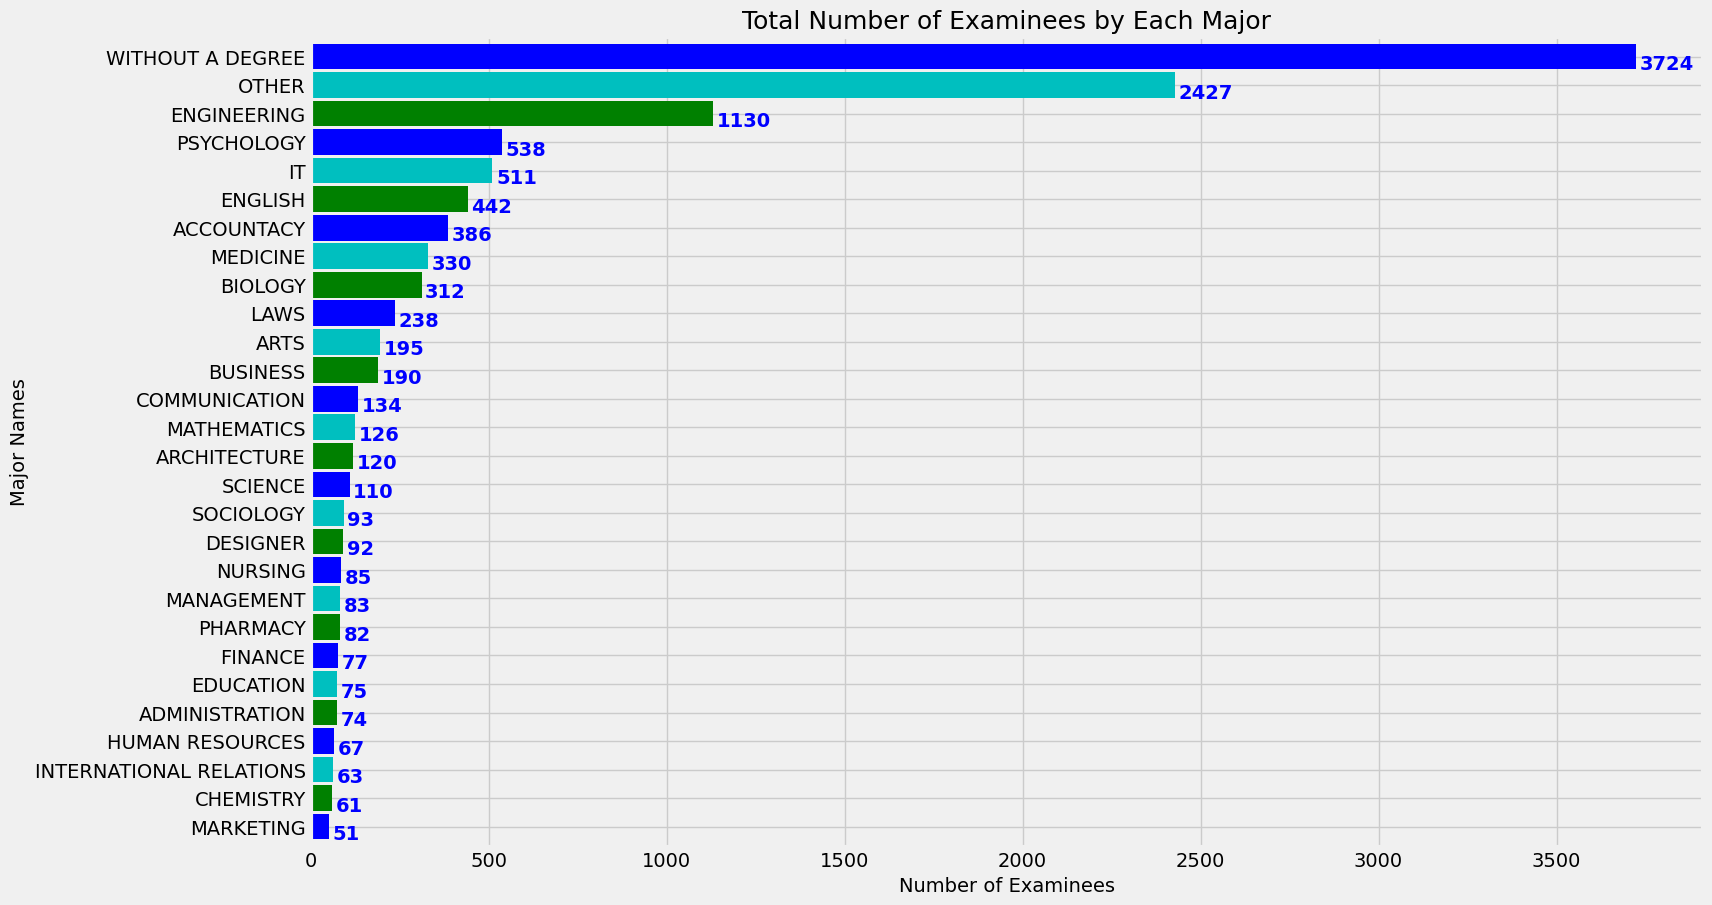

In [35]:
plt.figure(figsize=(16,10))
df['major'].value_counts().sort_values(ascending= True).plot(kind='barh', 
                                                             width = 0.9,
                                                             color = list('bgc'))

for i, v in enumerate(df['major'].value_counts().sort_values(ascending = True)):
    plt.text(v + 10, i - 0.45, str(v), color = 'blue', fontweight = 'bold')

_ = plt.xlabel("Number of Examinees", fontdict = {'fontsize' : 14, 'fontweight': 18})
_ = plt.ylabel("Major Names", fontdict = {'fontsize' : 14, 'fontweight': 14})
_ = plt.title('Total Number of Examinees by Each Major', fontdict = {'fontsize' : 18, 'fontweight': 18})

### **Number of Examinees by each country**

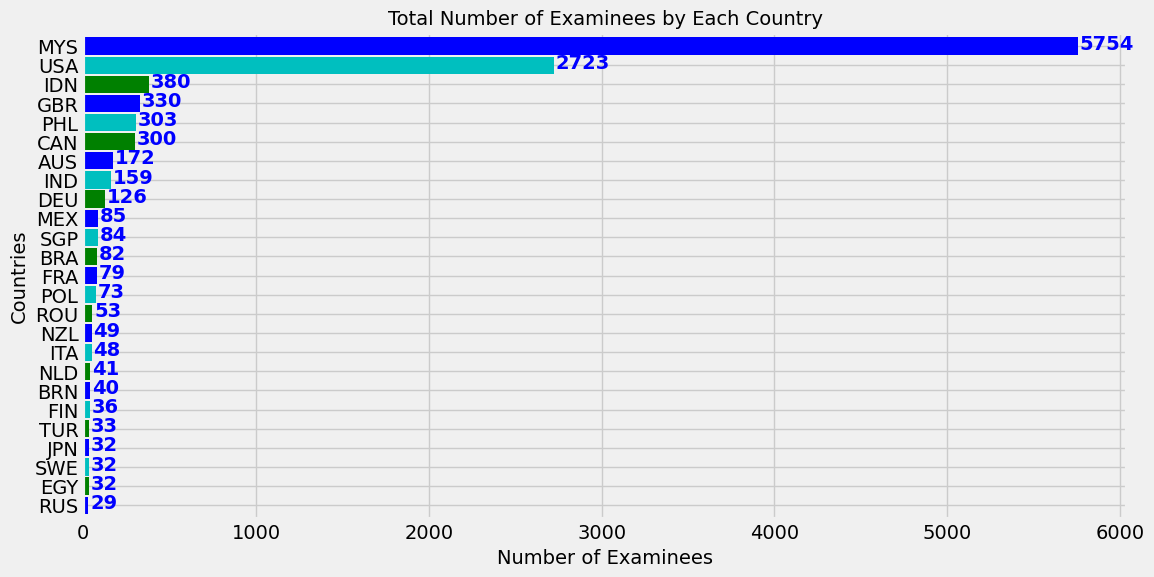

In [36]:
plt.figure(figsize = (12,6))
df['country_alpha_3'].value_counts()[:25].sort_values(ascending = True).plot(kind = 'barh', 
                                                             width = 0.9,
                                                             color = list('bgc'))

for i, v in enumerate(df['country_alpha_3'].value_counts()[:25].sort_values(ascending= True)):
    plt.text(v + 10, i - 0.15, str(v), color = 'blue', fontweight = 'bold')

_ = plt.xlabel("Number of Examinees", fontdict = {'fontsize' : 14, 'fontweight': 18})
_ = plt.ylabel("Countries", fontdict = {'fontsize' : 14, 'fontweight': 18})
_ = plt.title('Total Number of Examinees by Each Country', fontdict = {'fontsize' : 14, 'fontweight': 18})

### **Stacking Bar Plot for DASS Items**

In [37]:
# TO PLOT STACKING BARH for DASS ITEMS

# first create a DF with value_counts of each item
counts = []
for col in dass.columns:
  counts.append([dass[col].value_counts()[0], 
                 dass[col].value_counts()[1],
                 dass[col].value_counts()[2],
                 dass[col].value_counts()[3]])
  
# Convert list to DF
count = pd.DataFrame(counts, columns =['Did not apply to me at all',
                                       'Applied to me some degree',
                                       'Applied to me considerable degree',
                                       'Applied to me very much'])

count['item'] = dass.columns
# extract numbers in Items column
count['item'] = count.item.str.extract(('(\d+)'))
# Save item as INT
count['item'] = count['item'].astype('int32') 

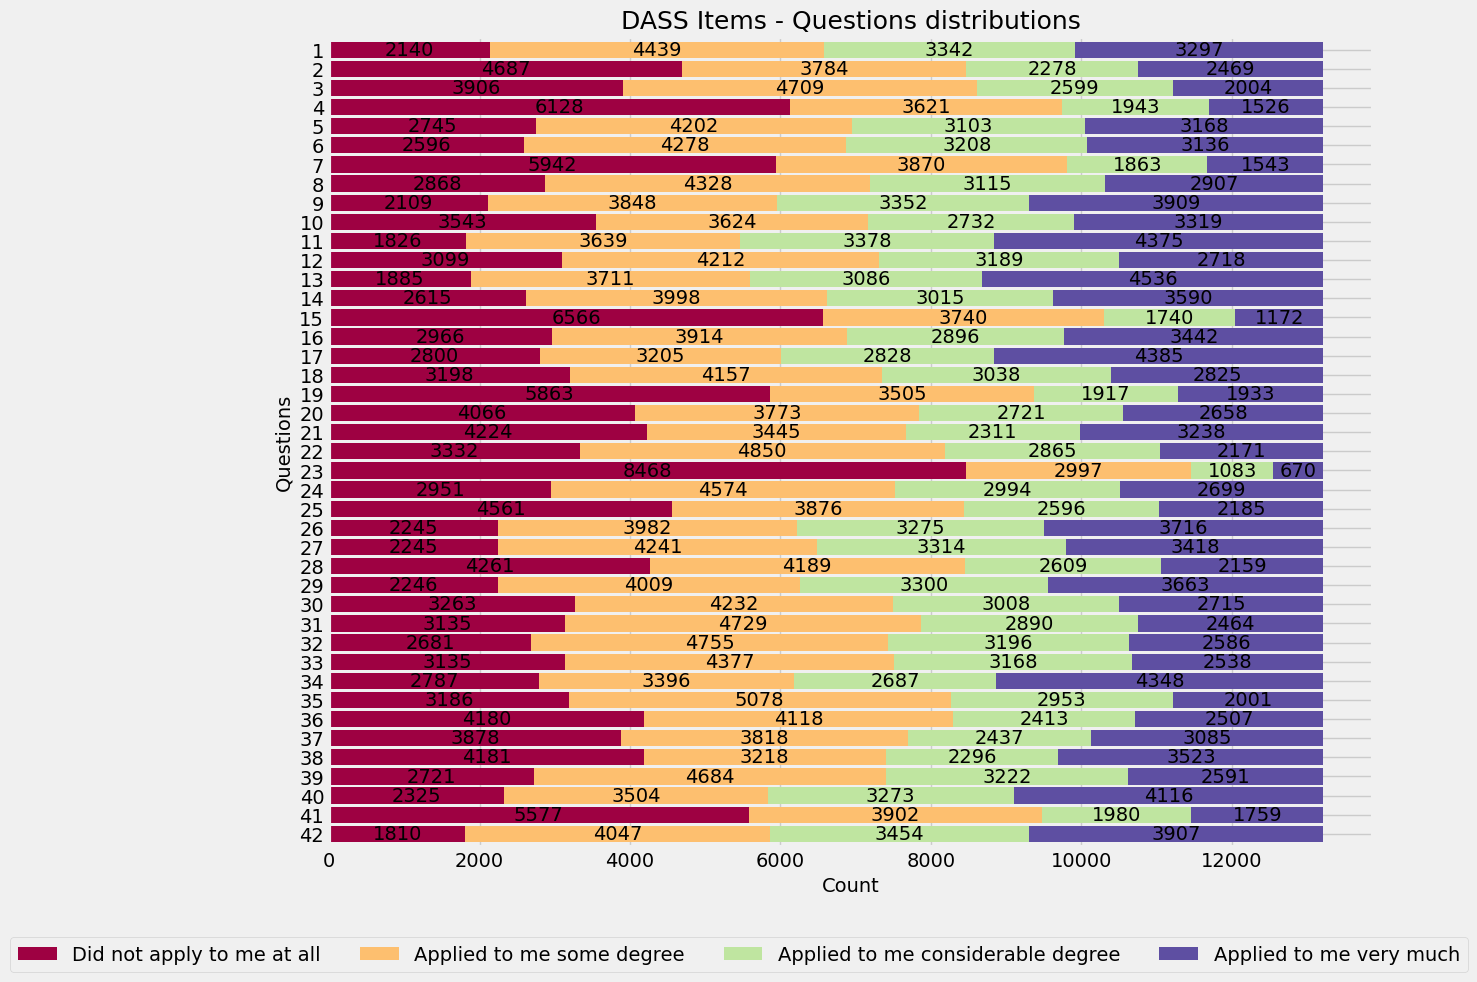

In [38]:
# Create a plot object

_ = count.sort_values('item', ascending = False).plot(x = 'item', 
           kind = 'barh',
           stacked = True,
           width = 0.85, 
           legend = True,
           colormap = 'Spectral',
           figsize = (12,10)
           )

plt.title("DASS Items - Questions distributions", fontdict = {'fontsize' : 18, 'fontweight' : 18})
plt.xlabel("Count", fontdict = {'fontsize' : 14, 'fontweight' : 18})
plt.ylabel("Questions", fontdict = {'fontsize' : 14, 'fontweight' : 18})

plt.legend( bbox_to_anchor = (1.1, -0.1), ncol = len(count.columns))

# add count of each response
for p in _.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         _.annotate(f'{width:0.0f}', xy = (left+width/2, bottom+height/2), ha = 'center', va = 'center')

### **Question Analysis**

The following items were answered as the examinee's felt that way most of the time:

+ Question 11: I found myself getting upset rather easily. 
+ Question 13: I felt sad and depressed. 
+ Question 18: I felt that I was rather touchy. 
+ Question 34: I felt I was pretty worthless. 
+ Question 40: I was worried about situations in which I might panic and make a fool of myself. On the other hand, following items were answered as the examinee's felt that way nearly never:
+ Question 15: I had a feeling of faintness. Question 23: I had difficulty in swallowing. It is obvious that most of the participants had mental / emotional symptoms of ADS; and do not have physical symptoms.

In [39]:
selected_questions = ['Q2E','Q4E','Q7E','Q15E','Q19E','Q23E','Q25E','Q41E']
ps_questions = dict(testelapse[selected_questions])
all_questions = dict(testelapse)

colors = []
for i in all_questions.keys():
    if i in ps_questions.keys():
      colors.append('g')
    else:
      colors.append('b')

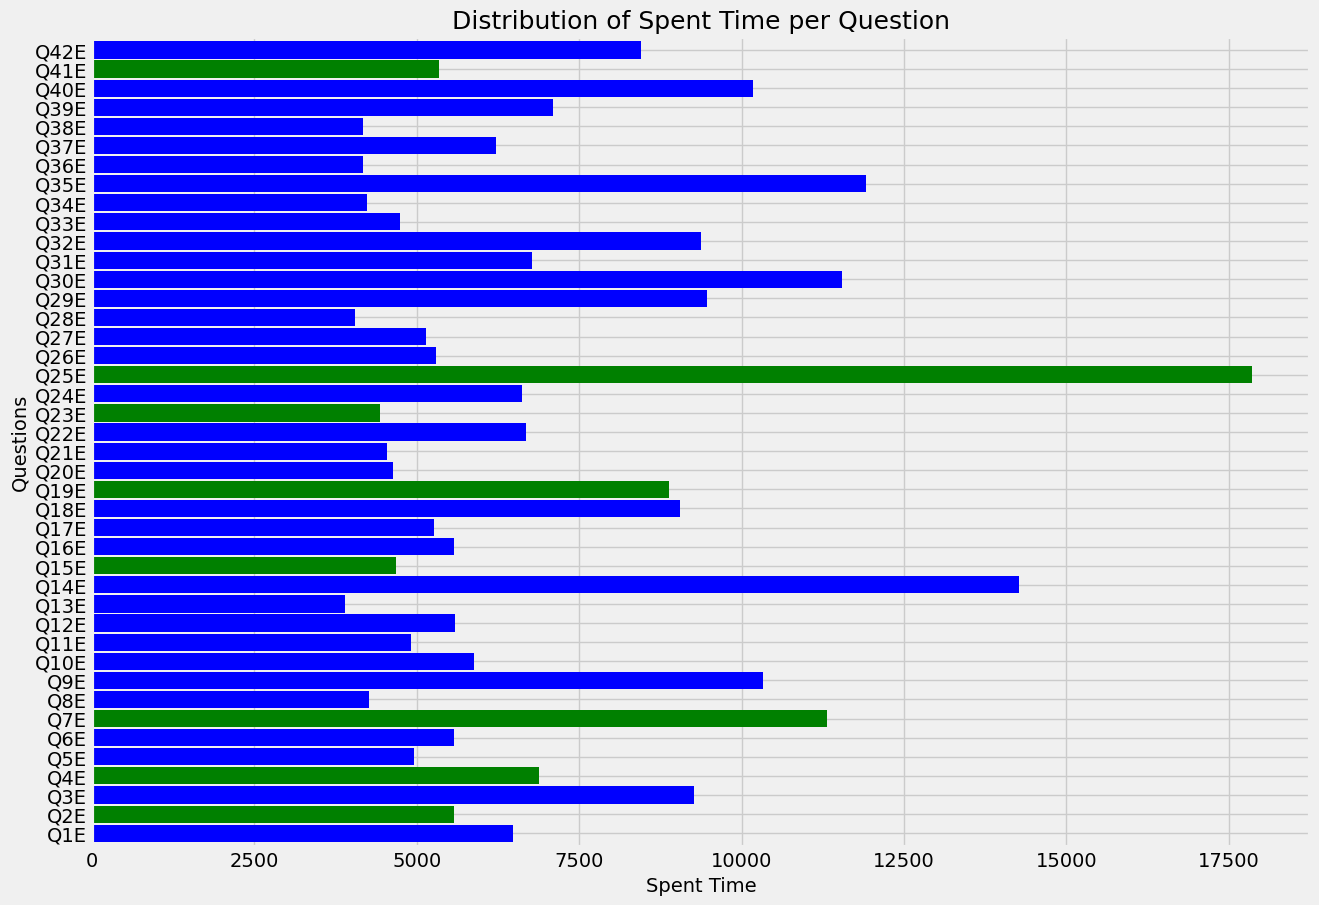

In [40]:
plt.figure(figsize=(14,10))
testelapse[[x for x in testelapse.columns if 'E' in x]].mean().plot(kind = 'barh', 
                                                                    width = 0.9,
                                                                    color = colors,
                                                                  )
_ = plt.xlabel("Spent Time", fontdict = {'fontsize' : 14, 'fontweight' : 18})
_ = plt.ylabel("Questions", fontdict = {'fontsize' : 14, 'fontweight' : 18})
_ = plt.title("Distribution of Spent Time per Question", fontdict = {'fontsize' : 18, 'fontweight' : 18})

The highest time spent on Question 9, followed by 35 and 25.
+ Q9 : I found myself in situations that made me so anxious I was most relieved when they ended.
+ Q25 : I was aware of the action of my heart in the absence of physical exertion (eg, sense of heart rate increase, heart missing a beat).
+ Q35 : I was intolerant of anything that kept me from getting on with what I was doing.

### **Scores among gender and race**

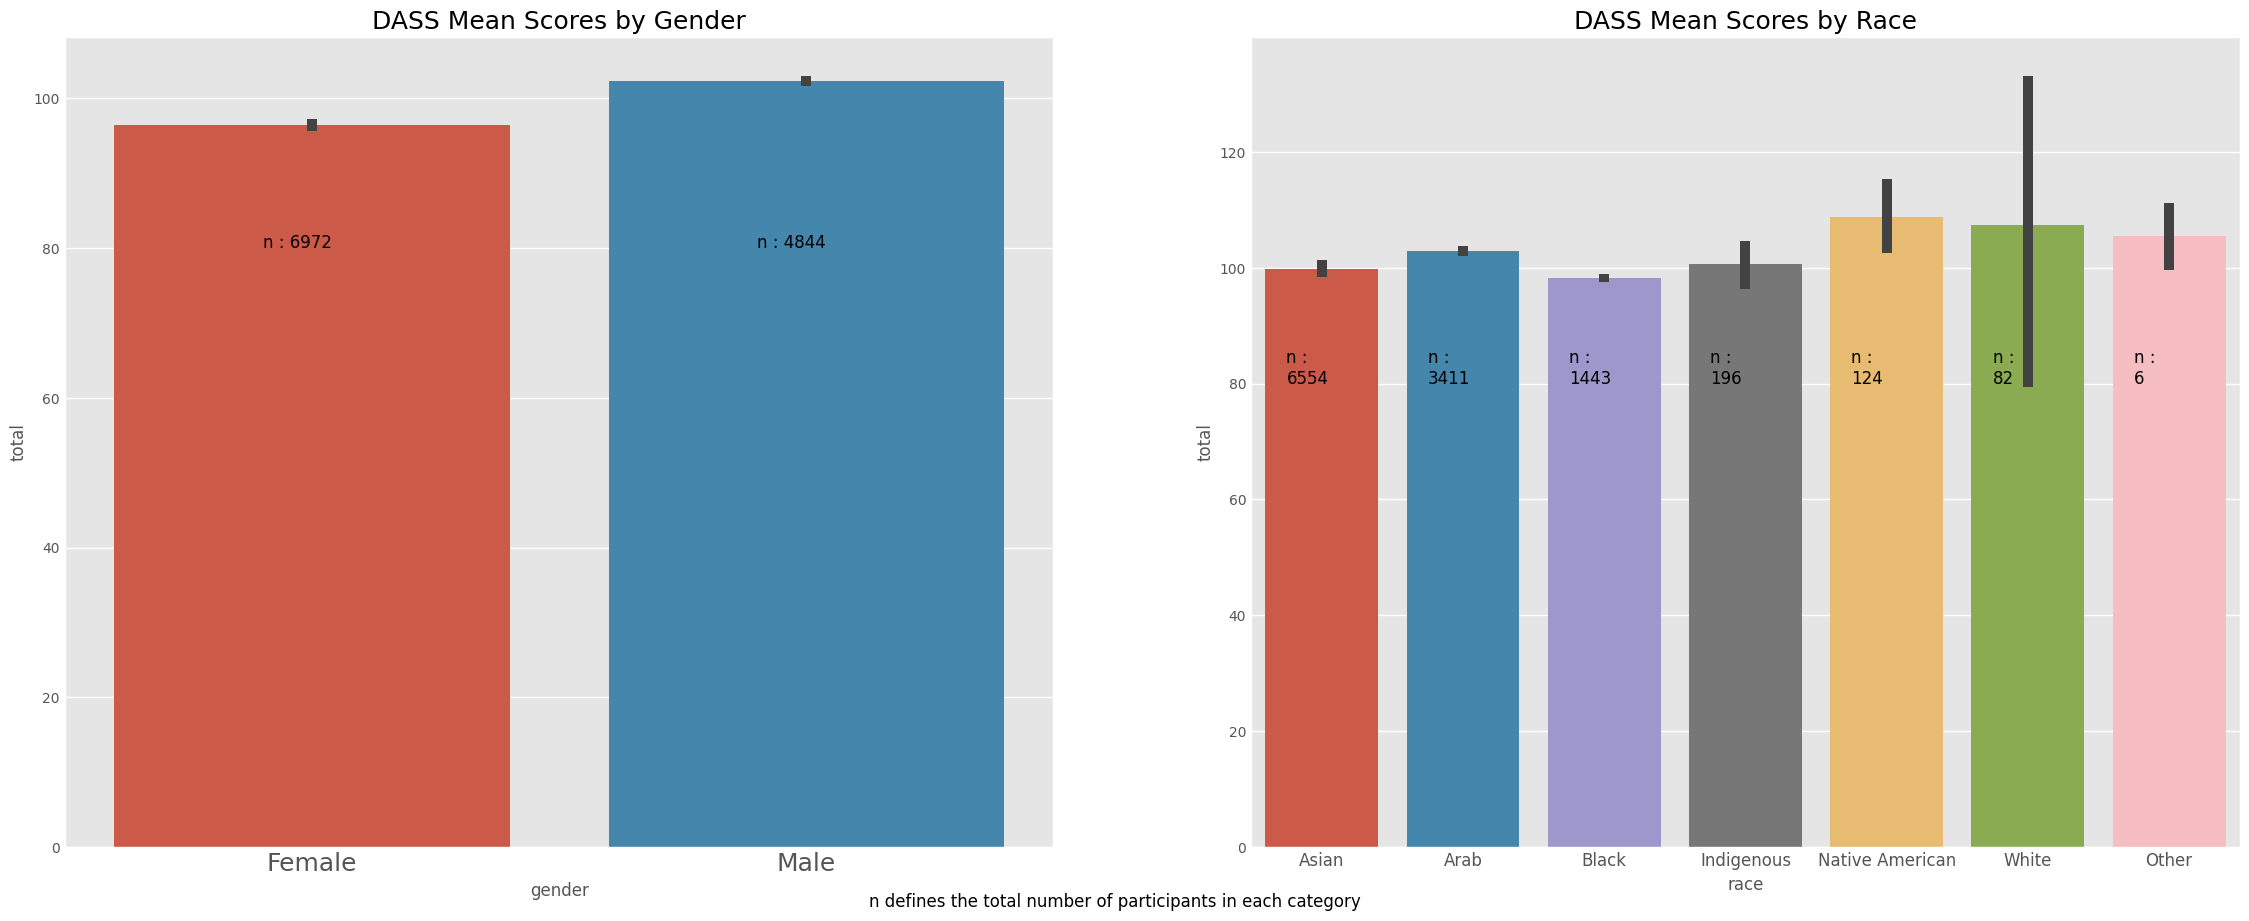

In [96]:
# scores amongst gender and race
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,10))

#ax1 : gender and total score means
_ = sns.barplot( y = df['total'], x = df['gender'], ax= ax1)

ax1.set_title('DASS Mean Scores by Gender', fontdict = {'fontsize' : 18, 'fontweight' : 18})

for i, v in enumerate(df['gender'].value_counts()):
  ax1.text(s = f"n : {v:}", x = i - 0.1, y = 80 , fontsize = 12)
ax1.set_xticklabels(['Female','Male'], fontdict = {'fontsize' : 18, 'fontweight' : 18})   


_ = sns.barplot( y = df['total'], x = df['race'], ax= ax2)

for i, v in enumerate(df['race'].value_counts()):
  ax2.text(s = f"n : \n{v:}", x = i - 0.25, y = 80, fontsize=12)

ax2.set_title('DASS Mean Scores by Race', fontdict = {'fontsize' : 18, 'fontweight' : 18})

#labels for race
labels_race = ['Asian', 
               'Arab',
               'Black', 
               'Indigenous', 
               'Native American', 
               'White', 
               'Other']
_ = ax2.set_xticklabels(labels_race, fontdict = {'fontsize' : 12, 'fontweight' : 18})

_ = plt.figtext(0.5, 0.01,'n defines the total number of participants in each category',
           ha='center', fontsize = 12)

Minorities and disadventagenous groups have higher DASS scores. However, group participant distributions in this study are way too much unbalanced. Therefore, it is really hard to make general assumptions rather than having a general idea what is going on.

Male gender obviously have lower DASS scores.

It is also hard to make assumptions about race, however we can have a better idea of asian, arab and black participants. Arabs have the highest DASS score among three groups. Apart from groups; all race groups have DASS scores higher than 100.

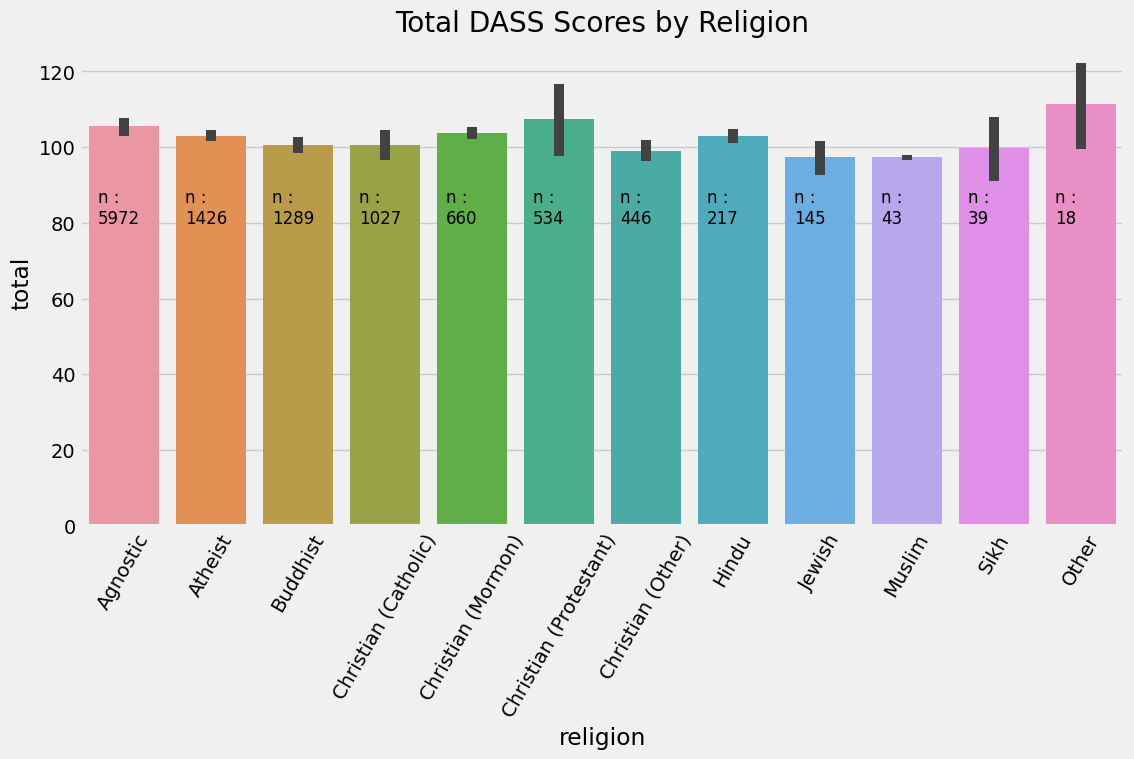

In [42]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
_ = sns.barplot( y = df['total'], x = df['religion'])

religion_labels = ['Agnostic', 
                   'Atheist', 
                   'Buddhist',
                   'Christian (Catholic)',
                   'Christian (Mormon)',
                   'Christian (Protestant)',
                   'Christian (Other)',
                   'Hindu', 
                   'Jewish', 
                   'Muslim', 
                   'Sikh',
                   'Other',
                   ]
plt.title('Total DASS Scores by Religion')
_ = ax.set_xticklabels(religion_labels, rotation= 60)


for i, v in enumerate(df['religion'].value_counts()):
  ax.text(s = f"n : \n{v:}", x = i - 0.30, y = 80, fontsize=12)

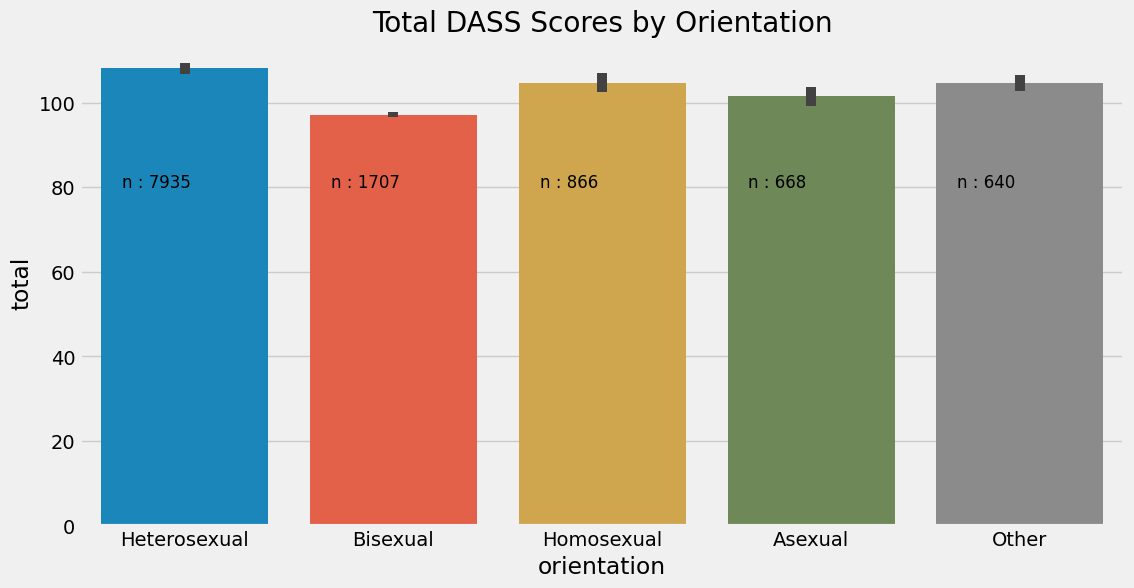

In [43]:
fig, ax = plt.subplots(figsize=(12,6))
_ = sns.barplot( y = df['total'], x = df['orientation'])

orientation_labels = ['Heterosexual',
                      'Bisexual',
                      'Homosexual',
                      'Asexual',
                      'Other'
                   ]
plt.title('Total DASS Scores by Orientation')
_ = ax.set_xticklabels(orientation_labels)


for i, v in enumerate(df['orientation'].value_counts()):
  ax.text(s = f"n : {v:}", x = i - 0.30, y = 80, fontsize=12)

Bisexuals have the highest DASS score, and all others apart from Hetero's have higher scores than hetero's.

### **DAS analysis wrt age**

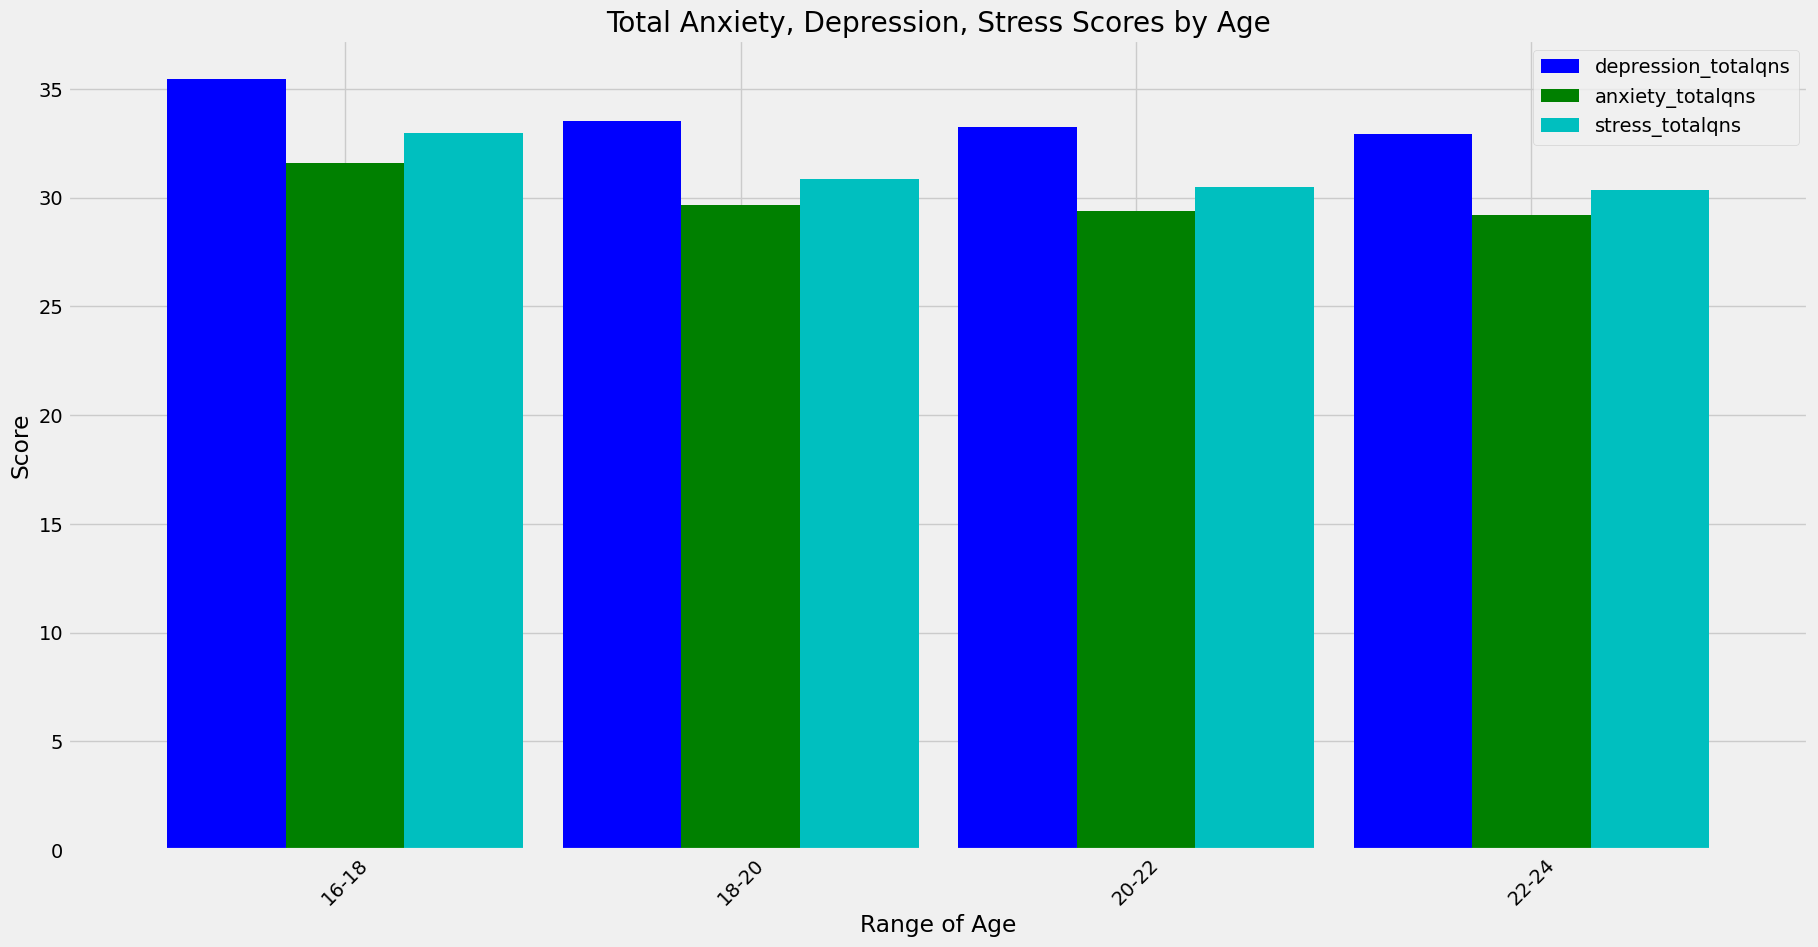

In [44]:
bins = [16, 18, 20, 22, 24]
labels = ['16-18','18-20', '20-22', '22-24']
df['age_range'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

df[[x for x in df.columns if '_t' in x] + ['age_range']].groupby('age_range').mean().plot(kind="bar",
                                                                              rot=45,
                                                                              figsize=(20,10),
                                                                              width=0.9,
                                                                              color=list('bgc'))
_ = plt.xlabel("Range of Age")
_ = plt.ylabel("Score")
_ = plt.title("Total Anxiety, Depression, Stress Scores by Age")

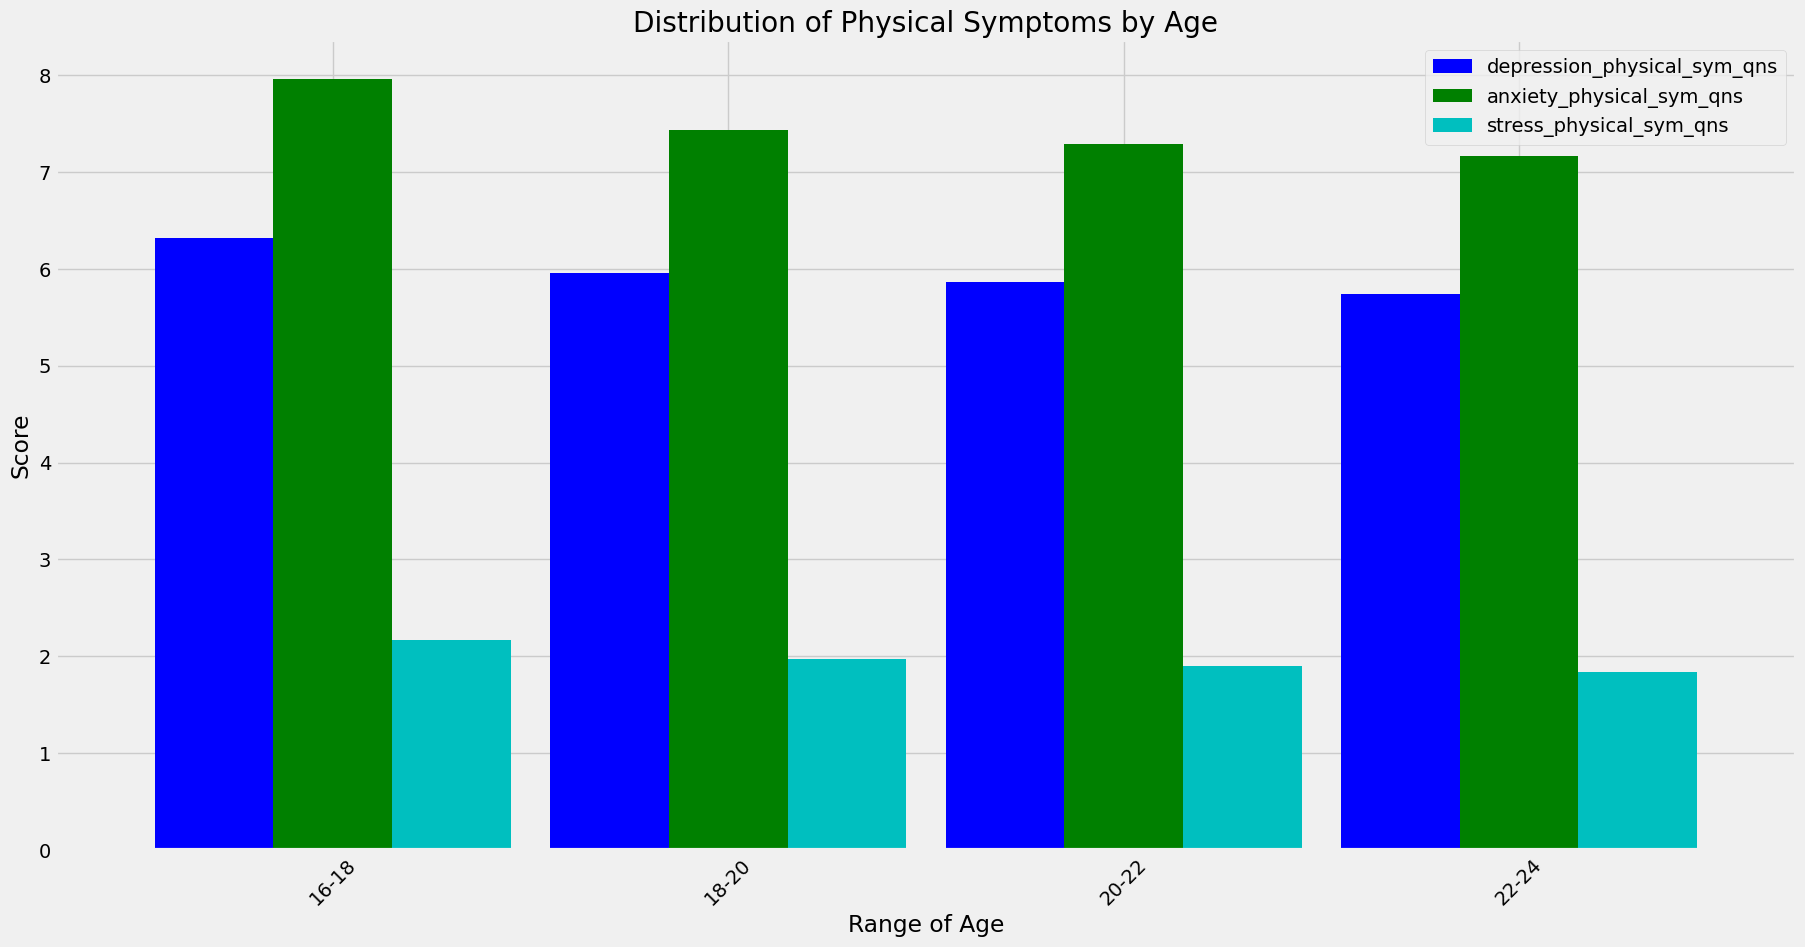

In [45]:
df[[x for x in df.columns if '_p' in x] + ['age_range']].groupby('age_range').mean().plot(kind="bar",
                                                                              rot=45,
                                                                              figsize=(20,10),
                                                                              width=0.9,
                                                                              color=list('bgc'))
_ = plt.xlabel("Range of Age")
_ = plt.ylabel("Score")
_ = plt.title("Distribution of Physical Symptoms by Age")

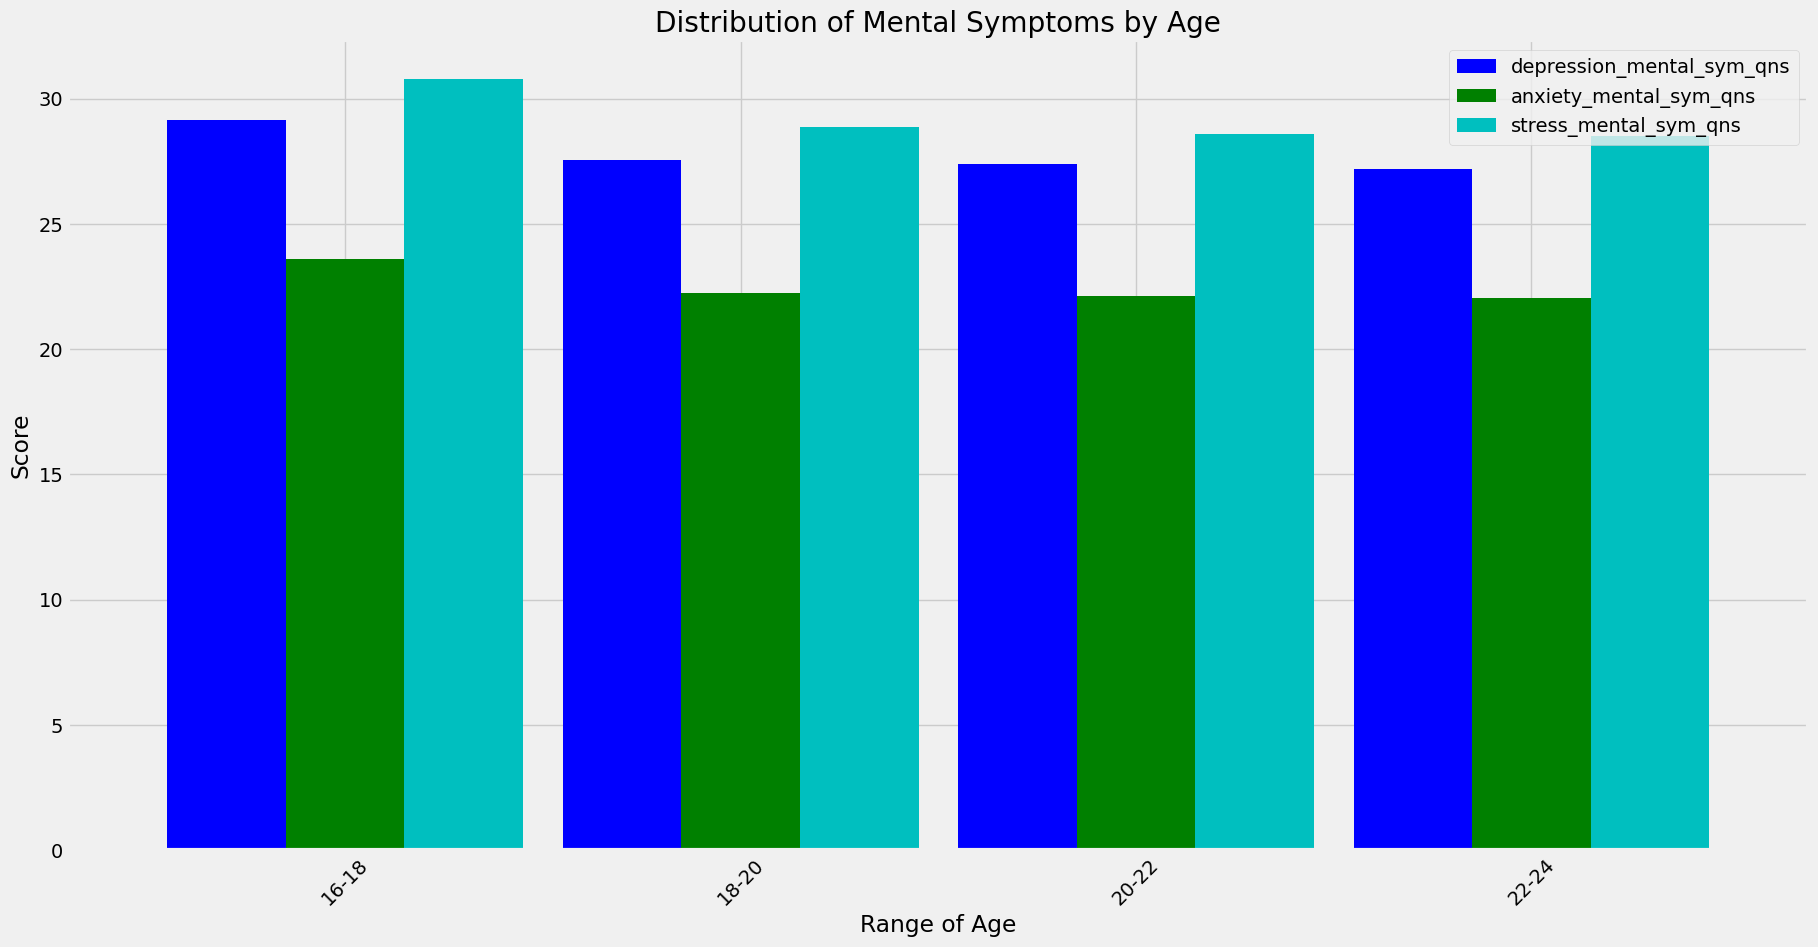

In [46]:
df[[x for x in df.columns if '_m' in x] + ['age_range']].groupby('age_range').mean().plot(kind="bar",
                                                                              rot=45,
                                                                              figsize=(20,10),
                                                                              width=0.9,
                                                                              color=list('bgc'))
_ = plt.xlabel("Range of Age")
_ = plt.ylabel("Score")
_ = plt.title("Distribution of Mental Symptoms by Age")

### **TIPI**

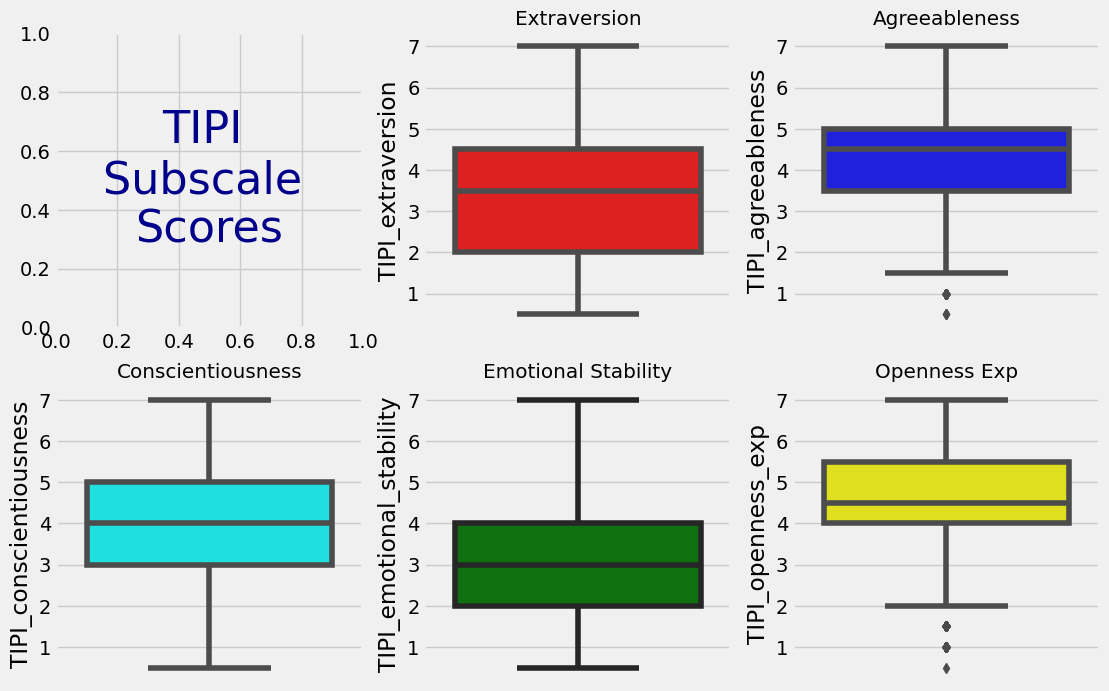

In [47]:
tipi_values = df[[i for i in df.columns if 'TIPI' in i]]

fig, ax = plt.subplots(2,3, figsize=(12,8))
_ = plt.style.use('ggplot')


_ = ax[0,0].text(s='TIPI \nSubscale \nScores',
             x= 0.5, y= 0.5,  
             fontsize= 32,
             ha='center', va='center', wrap=True,color = 'darkblue')
#plots

_ = sns.boxplot( y = tipi_values['TIPI_extraversion'], color = 'red',
               ax = ax[0,1])

_ = sns.boxplot( y = tipi_values['TIPI_agreeableness'], color = 'blue',
               ax = ax[0,2])

_ = sns.boxplot( y = tipi_values['TIPI_conscientiousness'], color = 'cyan',
               ax = ax[1,0])

_ = sns.boxplot( y = tipi_values['TIPI_emotional_stability'], color = 'green',
               ax = ax[1,1])

_ = sns.boxplot( y = tipi_values['TIPI_openness_exp'], color = 'yellow',
               ax = ax[1,2])

#titles
_ = ax[0,1].set_title('Extraversion')
_ = ax[0,2].set_title('Agreeableness')
_ = ax[1,0].set_title('Conscientiousness')
_ = ax[1,1].set_title('Emotional Stability')
_ = ax[1,2].set_title('Openness Exp')

In [48]:
tipi_and_age = df[[x for x in df.columns if 'TIPI' in x] + ['age']]
bins = [16, 18, 20, 22, 24]
labels = ['16-18','18-20', '20-22', '22-24']
tipi_and_age['age_range'] = pd.cut(tipi_and_age.age, bins, labels = labels,include_lowest = True)

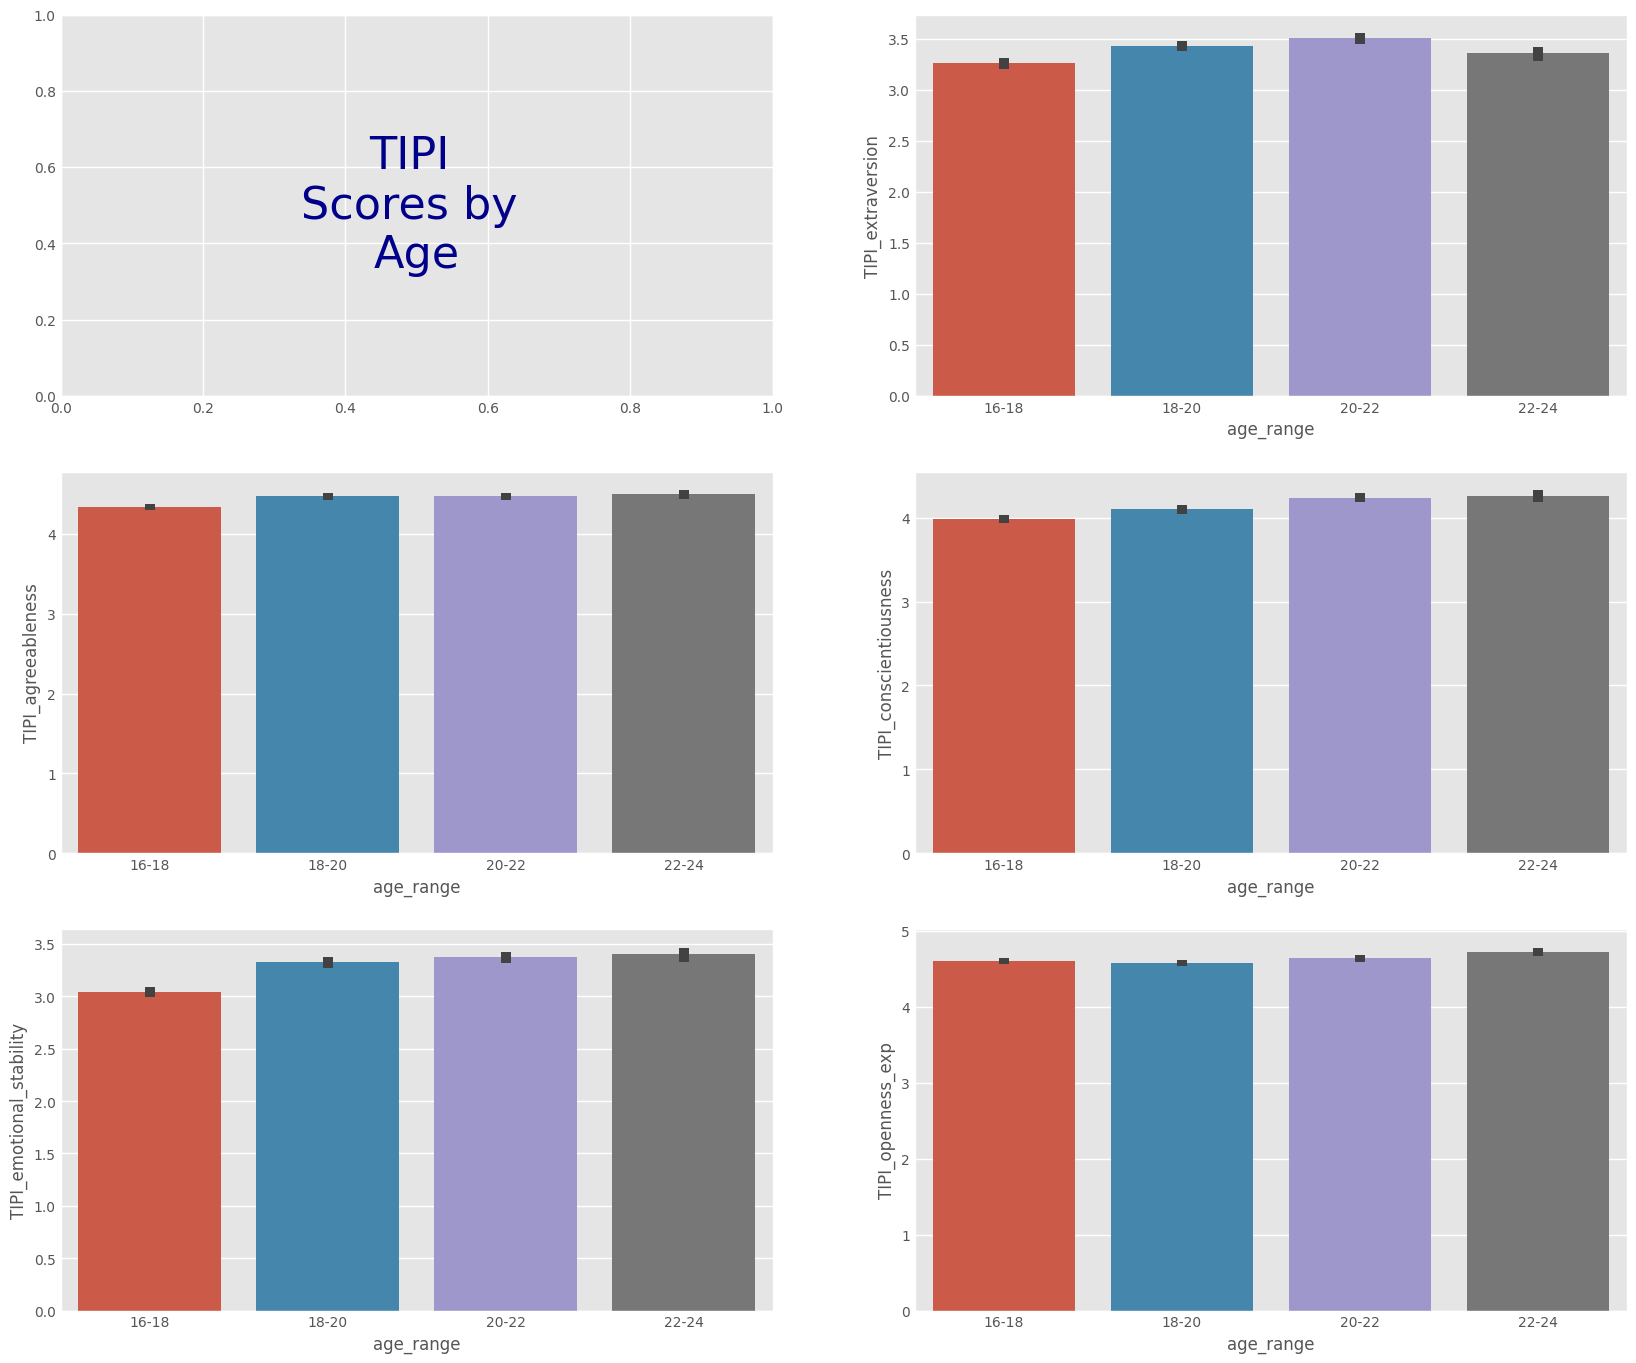

In [49]:
fig, ax = plt.subplots(3,2, figsize=(18,16))

_ = ax[0,0].text(s='TIPI \nScores by \nAge',
             x= 0.5, y= 0.5,  
             fontsize= 32,
             ha='center', va='center', wrap=True,color = 'darkblue')

_ = sns.barplot(x = 'age_range', y = 'TIPI_extraversion', data = tipi_and_age, ax= ax[0,1])
_ = sns.barplot(x = 'age_range', y = 'TIPI_agreeableness', data = tipi_and_age, ax= ax[1,0])
_ = sns.barplot(x = 'age_range', y = 'TIPI_conscientiousness', data = tipi_and_age, ax= ax[1,1])
_ = sns.barplot(x = 'age_range', y = 'TIPI_emotional_stability', data = tipi_and_age, ax= ax[2,0])
_ = sns.barplot(x = 'age_range', y = 'TIPI_openness_exp', data = tipi_and_age, ax= ax[2,1])

### **Personality values**

In [50]:
def correlation_plot(df, cmap='RdBu_r'):
    fig, ax = plt.subplots(figsize=(12,12))
    corr = df.corr()

    matshow = ax.matshow(corr, cmap=cmap)
    for (x, y), z in np.ndenumerate(corr):
        ax.text(y, x, '{:0.2f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar(matshow, orientation="horizontal")
    ax.tick_params(labelsize=12)
    plt.show()

In [51]:
personality_values = [x for x in df.columns if 'TIPI' in x]
personalities = df[personality_values]

In [52]:
dass_headers = ['depression_totalqns','anxiety_totalqns','stress_totalqns']
dass_values = df[dass_headers]

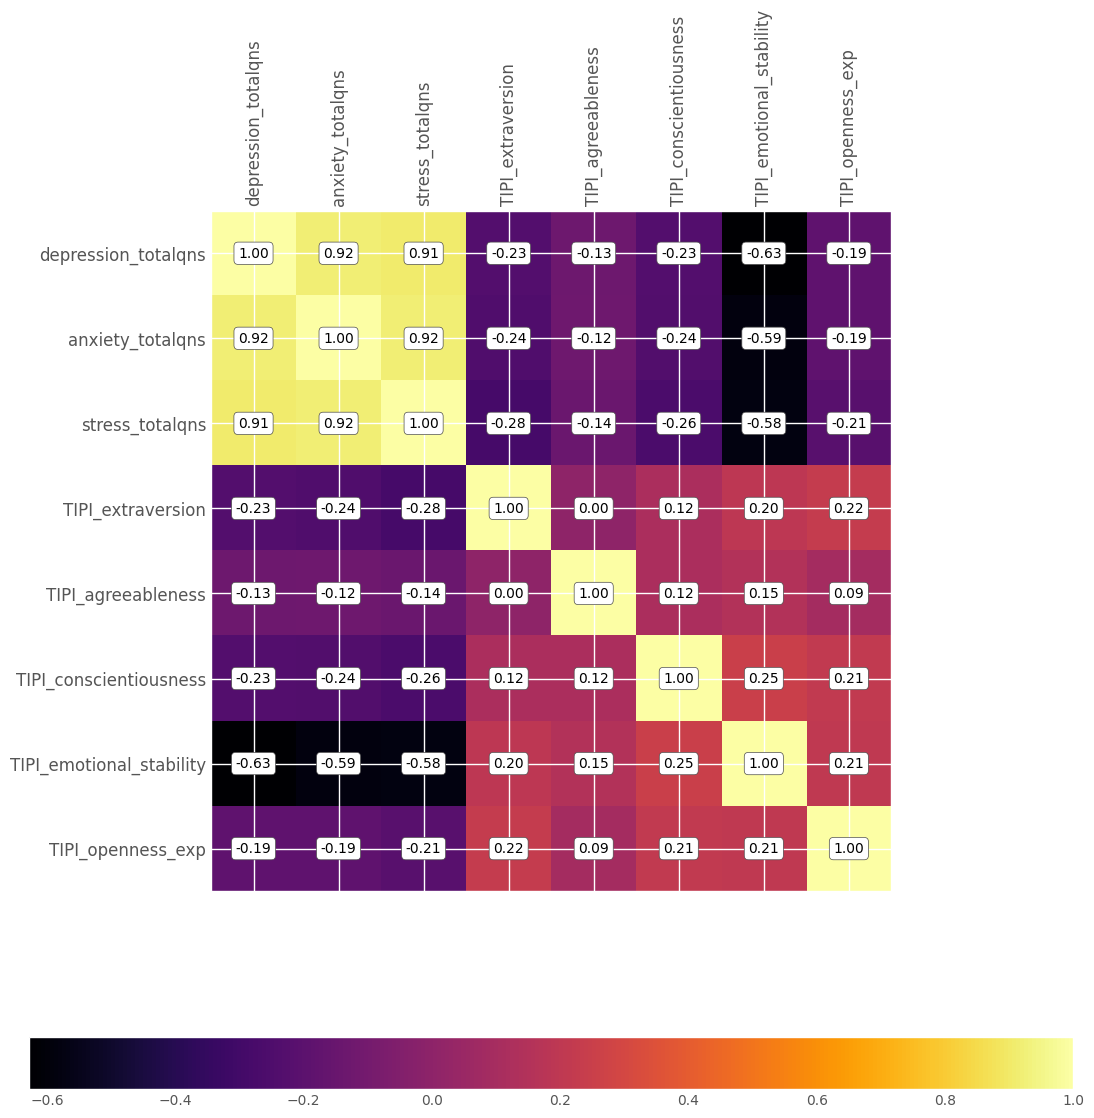

In [53]:
character = pd.concat([dass_values, personalities], axis=1)
correlation_plot(character, cmap = 'inferno')

### **How does 'race' distribution look like?**

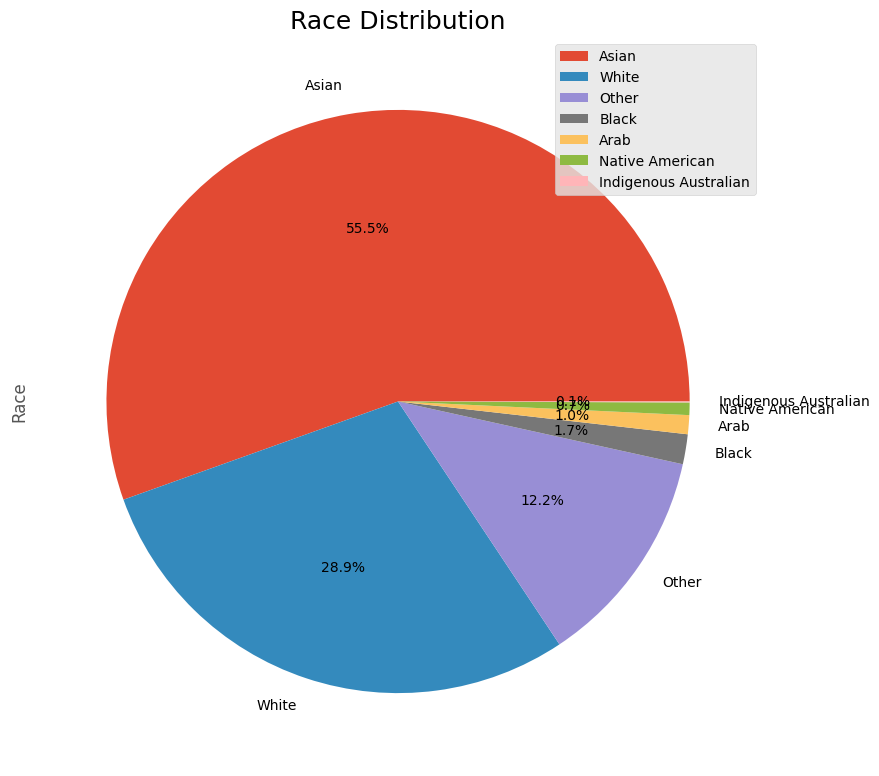

In [54]:
# Race groups distribution

plt.figure(figsize = (9, 9))
df['race'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Race Distribution', fontdict = {'fontsize' : 18, 
                                           'fontweight': 18})
plt.ylabel('Race')
plt.legend()

The plot shows that the majority of surveys were submitted by Asians accounting to 55.5% while the least were submitted by Indigenous Australians

### **Depression data EDA**

#### **What is the distribution of 'Severity' in the dataset**

In [55]:
# Function for countplot

def countplot_bars(df, feature):
    fig = px.histogram(df, x = feature, barmode = 'group')

    # Update layout settings to make it look good
    fig.update_layout(
        title = 'Countplot of Severity',
        xaxis_title = 'Severity',
        yaxis_title = 'Count',
        legend_title = 'Gender',
        font=dict(
            family='Arial',
            size=18,
            color='#2c3e50'
        ),
        plot_bgcolor='#f5f5f5',
        paper_bgcolor='#f5f5f5',
        bargap=0.1,
        bargroupgap=0.2,
        barmode='group',
        hovermode='closest',
        hoverlabel=dict(
            font_size=14,
            font_family='Arial',
            bgcolor='#e5e5e5',
        ),
    )

    # Display plot
    fig.show()

In [56]:
# 'Severity' countplot

countplot_bars(depression_data, 'Severity')

In [57]:
depression_data['Severity'].value_counts()

Extreme    3988
High       3440
Low        2572
Medium     1816
Name: Severity, dtype: int64

In [58]:
2572 / depression_data.shape[0]

0.21767095463777927

It can be observed the "Extreme" and "High" cases make up more than 50% of the distribution

+ Extreme ->  33.75 %
+ High    ->  29.11 %
+ Medium  ->  15.36 %
+ Low     ->  21.76 %

#### **How does age group distribution look like?**

Text(0.5, 0, 'Age')

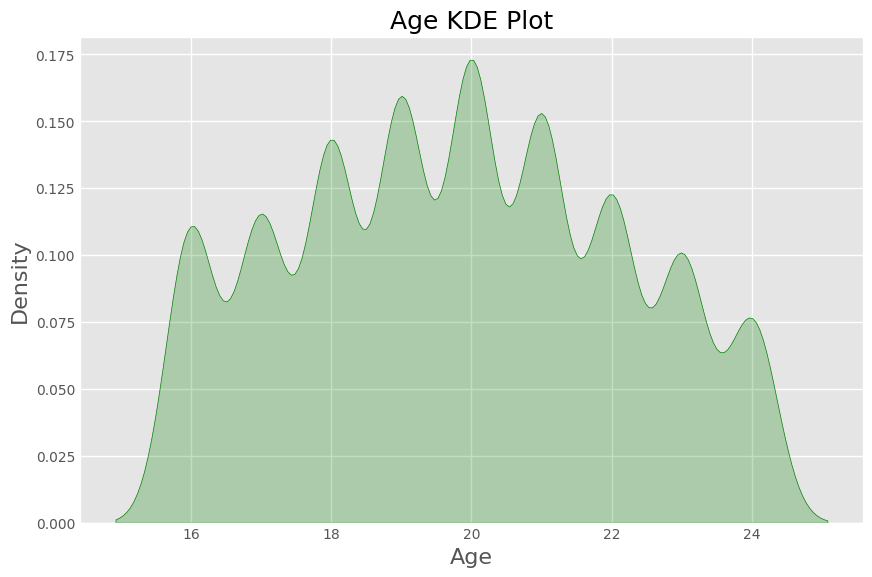

In [59]:
# Age KDE Plot

plt.figure(figsize = (9, 6))
sns.kdeplot(data = depression_data, x = 'age', color = 'g', shade = True)
plt.title('Age KDE Plot', fontdict = {'fontsize' : 18, 'fontweight': 18})
plt.ylabel('Density', fontdict = {'fontsize' : 16, 'fontweight': 16})
plt.xlabel('Age', fontdict = {'fontsize' : 16, 'fontweight': 16})

#### **Any correaltion b/w Severity and Age?**

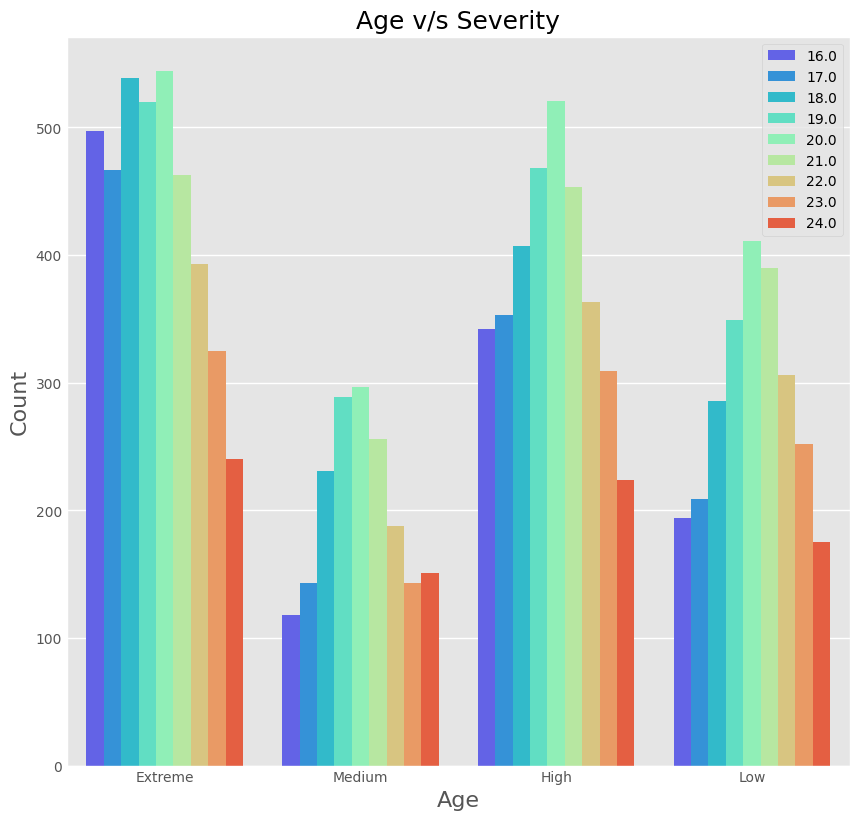

In [60]:
# Age v/s Severity

plt.figure(figsize = (9, 9))
sns.countplot(data = depression_data, x = 'Severity', hue = 'age', palette = 'rainbow')
plt.title('Age v/s Severity', fontdict = {'fontsize' : 18, 'fontweight': 18})
plt.ylabel('Count', fontdict = {'fontsize' : 16, 'fontweight': 16})
plt.xlabel('Age', fontdict = {'fontsize' : 16, 'fontweight': 16})
plt.legend()

#### **How much is the family size on an average?**

Text(0.5, 0, 'Family Size')

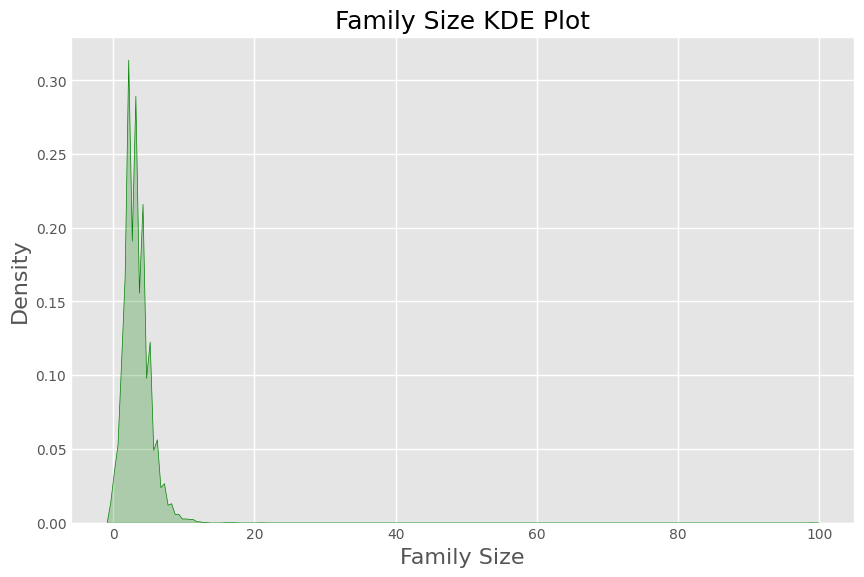

In [61]:
# Family Size KDE Plot

plt.figure(figsize = (9, 6))
sns.kdeplot(data = depression_data, x = 'familysize', color = 'g', shade = True)
plt.title('Family Size KDE Plot', fontdict = {'fontsize' : 18, 'fontweight': 18})
plt.ylabel('Density', fontdict = {'fontsize' : 16, 'fontweight': 16})
plt.xlabel('Family Size', fontdict = {'fontsize' : 16, 'fontweight': 16})

#### **What is average, std etc of each numerical feature for Depression data?**

In [62]:
# Numerical Features

num_features = depression_data.select_dtypes(include = np.number)

num_features.describe().T

count       mean       std   min   25%   50%  \
Q3A                       11816.0   1.204807  1.028842   0.0   0.0   1.0   
Q5A                       11816.0   1.518450  1.071620   0.0   1.0   1.0   
Q10A                      11816.0   1.446936  1.134640   0.0   0.0   1.0   
Q13A                      11816.0   1.779028  1.072333   0.0   1.0   2.0   
Q16A                      11816.0   1.518957  1.106582   0.0   1.0   1.0   
Q17A                      11816.0   1.668670  1.144559   0.0   1.0   2.0   
Q21A                      11816.0   1.350796  1.166283   0.0   0.0   1.0   
Q24A                      11816.0   1.420024  1.050660   0.0   1.0   1.0   
Q26A                      11816.0   1.649458  1.065127   0.0   1.0   2.0   
Q31A                      11816.0   1.361459  1.040492   0.0   1.0   1.0   
Q34A                      11816.0   1.652505  1.143647   0.0   1.0   2.0   
Q37A                      11816.0   1.360020  1.135153   0.0   0.0   1.0   
Q38A                      11816.0   1.398274  1.184600   0.0   0.0   1.0   
Q42A                      11816.0   1.735613  1.033180   0.0   1.0   2.0   
age                       11816.0  19.800017  2.335261  16.0  18.0  20.0   
TIPI_extraversion         11816.0   3.378563  1.550105   0.5   2.0   3.5   
TIPI_agreeableness        11816.0   4.433603  1.233339   0.5   3.5   4.5   
TIPI_conscientiousness    11816.0   4.122345  1.470176   0.5   3.0   4.0   
TIPI_emotional_stability  11816.0   3.256454  1.528767   0.5   2.0   3.0   
TIPI_openness_exp         11816.0   4.625684  1.315530   0.5   4.0   4.5   

                           75%   max  
Q3A                        2.0   3.0  
Q5A                        2.0   3.0  
Q10A                       3.0   3.0  
Q13A                       3.0   3.0  
Q16A                       3.0   3.0  
Q17A                       3.0   3.0  
Q21A                       2.0   3.0  
Q24A                       2.0   3.0  
Q26A                       3.0   3.0  
Q31A                       2.0   3.0  
Q34A                       3.0   3.0  
Q37A                       2.0   3.0  
Q38A                       3.0   3.0  
Q42A                       3.0   3.0  
age                       22.0  24.0  
TIPI_extraversion          4.5   7.0  
TIPI_agreeableness         5.0   7.0  
TIPI_conscientiousness     5.0   7.0  
TIPI_emotional_stability   4.0   7.0  
TIPI_openness_exp          5.5   7.0

#### **What does religion distribution look like?**

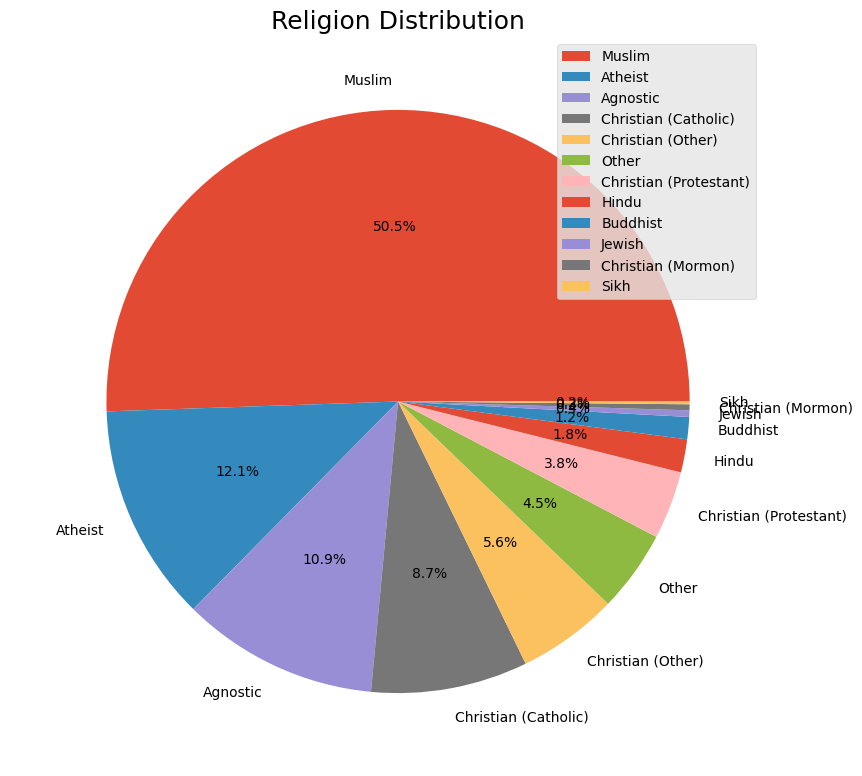

In [63]:
# Religion distribution

plt.figure(figsize = (9, 9))
depression_data['religion'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Religion Distribution', fontdict = {'fontsize' : 18, 
                                                 'fontweight': 18})
plt.ylabel(' ')
plt.legend()

#### **Are there any outliers in the depression data?**

Columns with outlier values:
Index(['TIPI_agreeableness', 'TIPI_openness_exp'], dtype='object')


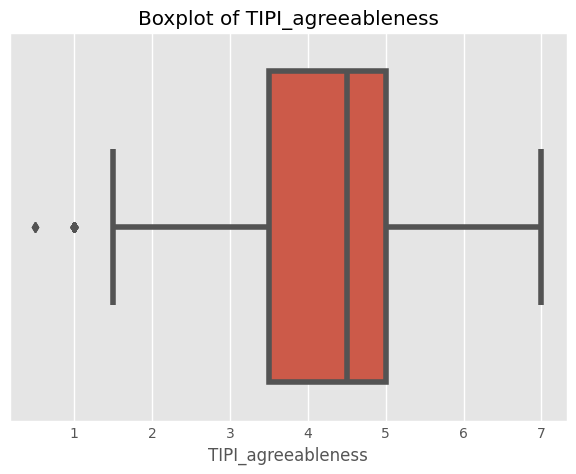

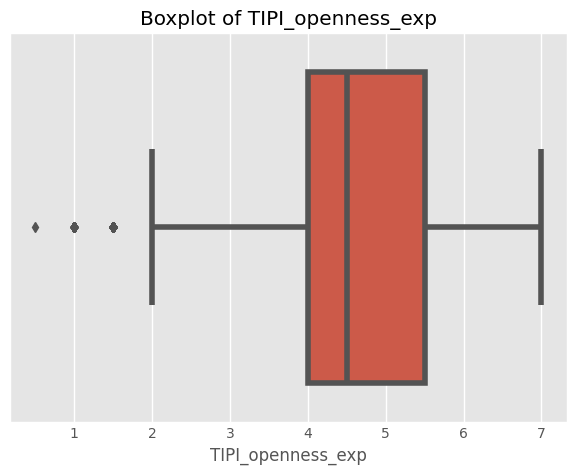

In [64]:
# Calculate the quartiles and IQR for each column
Q1 = depression_data.quantile(0.25)
Q3 = depression_data.quantile(0.75)
IQR = Q3 - Q1

# Find columns with outlier values
outliers = ((depression_data < (Q1 - 1.5 * IQR)) | (depression_data > (Q3 + 1.5 * IQR))).any()

# Print the columns with outlier values
print("Columns with outlier values:")
print(outliers[outliers == True].index)

# Create boxplots for columns with outlier values
for col in outliers[outliers == True].index:
    sns.boxplot(x = depression_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## **Modeling**

In [65]:
# Import dependencies
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,classification_report, mean_squared_error

### **Model Definitions**

In [66]:
# Functions to define models

# Decision Tree Classifier
def decision_trees():
    model = DecisionTreeClassifier(criterion = 'entropy', 
                                   splitter='best', 
                                   min_samples_split = 9,
                                   min_samples_leaf = 2,
                                   max_depth = 100).fit(X_train_scaled, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1_score = round(f1_score(y_test, y_pred,average = 'weighted'), 2)
    recall = round(recall_score(y_test, y_pred, average = 'weighted'), 2)
    precision = round(precision_score(y_test, y_pred, average = 'weighted'), 2)
    classification = classification_report(y_true = y_test, y_pred = y_pred)
    
    return classification
    
    
# Random Forest
def random_forest():
    model = RandomForestClassifier(n_estimators = 40,
                                   min_samples_split = 10,
                                   min_samples_leaf = 7,
                                   max_depth = 10).fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1_score = round(f1_score(y_test, y_pred,average = 'weighted'), 2)
    recall = round(recall_score(y_test, y_pred, average = 'weighted'), 2)
    precision = round(precision_score(y_test, y_pred, average = 'weighted'), 2)
    classification = classification_report(y_true = y_test, y_pred = y_pred)
    
    return classification


# Naive Bayes
def naive_bayes():
    model = GaussianNB().fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1_score = round(f1_score(y_test, y_pred,average = 'weighted'), 2)
    recall = round(recall_score(y_test, y_pred, average = 'weighted'), 2)
    precision = round(precision_score(y_test, y_pred, average = 'weighted'), 2)
    classification = classification_report(y_true = y_test, y_pred = y_pred)
    
    return classification


# K Nearest Neighbors
def knn():
    model = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1_score = round(f1_score(y_test, y_pred,average = 'weighted'), 2)
    recall = round(recall_score(y_test, y_pred, average = 'weighted'), 2)
    precision = round(precision_score(y_test, y_pred, average = 'weighted'), 2)
    classification = classification_report(y_true = y_test, y_pred = y_pred)
    
    return classification


# SVM Classifier
def svm_classifier():
    model = SVC(C = 100, gamma = 0.1, kernel = 'rbf').fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1_score = round(f1_score(y_test, y_pred,average = 'weighted'), 2)
    recall = round(recall_score(y_test, y_pred, average = 'weighted'), 2)
    precision = round(precision_score(y_test, y_pred, average = 'weighted'), 2)
    classification = classification_report(y_true = y_test, y_pred = y_pred)
    
    return classification


# Results
def results():
    result = {
                'Model':['Decision Tree','Random Forest','GaussianNB','K Nearest-Neighbors','SVM'],
                'Accuracy(%)':[dep_accuracy_dt * 100, dep_accuracy_rf * 100, dep_accuracy_gb * 100, dep_accuracy_knn * 100, dep_accuracy_svm * 100],
                'F1_Score(%)':[dep_f1_score_dt * 100, dep_f1_score_rf * 100, dep_f1_score_gb * 100, dep_f1_score_knn * 100, dep_f1_score_svm * 100],
                'Precision(%)':[dep_precision_dt * 100, dep_precision_rf * 100, dep_precision_gb * 100, dep_precision_knn * 100, dep_precision_svm * 100],
                'Recall(%)':[dep_recall_dt * 100, dep_recall_rf * 100, dep_recall_gb * 100, dep_recall_knn * 100, dep_recall_svm * 100]
             }

    results_df = pd.DataFrame(result)

### **Modeling for DEPRESSION**

#### **Data preparation**

In [67]:
# Target feature

depression_data['Severity'] = depression_data['Severity'].map({'Low' : 1, 'Medium' : 2, 'High' : 3, 'Extreme' : 4})

# Feature Selection
depression_data = depression_data.select_dtypes(include = np.number)

# Check head
depression_data.head()

Q3A  Q5A  Q10A  Q13A  Q16A  Q17A  Q21A  Q24A  Q26A  Q31A  Q34A  Q37A  \
8     2    2     2     3     3     2     2     2     3     3     3     3   
18    1    2     1     0     2     0     0     2     0     2     0     0   
24    1    2     1     2     2     1     1     1     3     1     1     2   
30    2    2     1     2     1     2     1     3     2     1     2     2   
31    1    3     1     3     1     3     3     2     3     0     3     1   

    Q38A  Q42A   age  TIPI_extraversion  TIPI_agreeableness  \
8      2     3  16.0                1.0                 5.0   
18     1     3  19.0                2.5                 2.5   
24     1     2  20.0                2.0                 4.5   
30     2     1  19.0                3.5                 3.5   
31     3     3  18.0                3.0                 5.0   

    TIPI_conscientiousness  TIPI_emotional_stability  TIPI_openness_exp  \
8                      3.0                       1.0                4.5   
18                     4.0                       6.5                6.0   
24                     2.0                       3.0                4.5   
30                     4.5                       2.0                5.0   
31                     4.0                       4.0                4.5   

    Severity  
8          4  
18         2  
24         3  
30         3  
31         4

In [68]:
# Define independent and dependent variables
X = depression_data.drop(columns = ['Severity'])
y = depression_data['Severity']

# Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### **Decision Trees**

In [69]:
# Decision Tree

dep_dt = DecisionTreeClassifier(criterion = 'entropy',
                                splitter = 'best',
                                min_samples_split = 9,
                                min_samples_leaf = 2,
                                max_depth = 100, 
                                random_state = 42).fit(X_train, y_train)

y_pred = dep_dt.predict(X_test)

dep_accuracy_dt = round(accuracy_score(y_test,y_pred),2)

dep_f1_score_dt = round(f1_score(y_test,y_pred,average = 'weighted'),2)

dep_recall_dt = round(recall_score(y_test,y_pred,average = 'weighted'),2)

dep_precision_dt = round(precision_score(y_test,y_pred,average = 'weighted'),2)

dep_dt_classification = classification_report(y_true=y_test,y_pred = y_pred)

print(dep_dt_classification)

              precision    recall  f1-score   support

           1       0.85      0.88      0.86       506
           2       0.61      0.65      0.63       358
           3       0.78      0.77      0.78       673
           4       0.91      0.88      0.90       827

    accuracy                           0.81      2364
   macro avg       0.79      0.79      0.79      2364
weighted avg       0.82      0.81      0.81      2364



#### **Random Forest**

In [70]:
# Random Forest

RandomForest = RandomForestClassifier(n_estimators = 40,
                                      min_samples_split = 10,
                                      min_samples_leaf = 7,
                                      max_depth = 10,
                                      random_state = 42).fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

dep_accuracy_rf = round(accuracy_score(y_test, y_pred), 2)

dep_f1_score_rf = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

dep_recall_rf = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

dep_precision_rf = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

dep_rf_classification = classification_report(y_true = y_test, y_pred = y_pred)

print(dep_rf_classification)

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       506
           2       0.85      0.79      0.82       358
           3       0.87      0.95      0.91       673
           4       0.98      0.94      0.96       827

    accuracy                           0.92      2364
   macro avg       0.91      0.90      0.91      2364
weighted avg       0.92      0.92      0.92      2364



#### **Naive Bayes**

In [71]:
# Naive Bayes

dep_gb = GaussianNB().fit(X_train, y_train)

y_pred = dep_gb.predict(X_test)

dep_accuracy_gb = round(accuracy_score(y_test, y_pred), 2)

dep_f1_score_gb = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

dep_recall_gb = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

dep_precision_gb = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

dep_classification_gb = classification_report(y_test, y_pred)

print(dep_classification_gb)

              precision    recall  f1-score   support

           1       0.99      0.84      0.91       506
           2       0.74      0.97      0.84       358
           3       0.88      0.94      0.91       673
           4       1.00      0.90      0.95       827

    accuracy                           0.91      2364
   macro avg       0.90      0.91      0.90      2364
weighted avg       0.92      0.91      0.91      2364



#### **K Nearest Neighbors**

In [72]:
# K Nearest Neighbors

dep_knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

y_pred = dep_knn.predict(X_test)

dep_accuracy_knn = round(accuracy_score(y_test, y_pred), 2)

dep_f1_score_knn = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

dep_recall_knn = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

dep_precision_knn = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

dep_classification_knn = classification_report(y_test, y_pred)

print(dep_classification_knn)

              precision    recall  f1-score   support

           1       0.91      0.97      0.94       506
           2       0.82      0.80      0.81       358
           3       0.93      0.88      0.90       673
           4       0.96      0.97      0.97       827

    accuracy                           0.92      2364
   macro avg       0.91      0.91      0.91      2364
weighted avg       0.92      0.92      0.92      2364



#### **SVM**

In [73]:
# SVM

dep_svm = SVC(C = 100, gamma = 0.1, kernel = 'rbf').fit(X_train,y_train)

y_pred = dep_svm.predict(X_test)

dep_accuracy_svm = round(accuracy_score(y_test,y_pred), 2)

dep_f1_score_svm = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

dep_recall_svm = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

dep_precision_svm = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

dep_classification_svm = classification_report(y_test, y_pred)

print(dep_classification_svm)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       506
           2       0.92      0.91      0.92       358
           3       0.94      0.98      0.96       673
           4       0.99      0.97      0.98       827

    accuracy                           0.96      2364
   macro avg       0.96      0.96      0.96      2364
weighted avg       0.96      0.96      0.96      2364



#### **Results**

In [74]:
Result = {
            'Model':['Decision Tree','Random Forest','GaussianNB','K Nearest-Neighbors','SVM'],
            'Accuracy(%)':[dep_accuracy_dt*100,dep_accuracy_rf*100,dep_accuracy_gb*100,dep_accuracy_knn*100,dep_accuracy_svm*100],
            'F1_Score(%)':[dep_f1_score_dt*100, dep_f1_score_rf*100,dep_f1_score_gb*100,dep_f1_score_knn*100,dep_f1_score_svm*100],
            'Precision(%)':[dep_precision_dt*100,dep_precision_rf*100,dep_precision_gb*100,dep_precision_knn*100,dep_precision_svm*100],
            'Recall(%)':[dep_recall_dt*100, dep_recall_rf*100,dep_recall_gb*100,dep_recall_knn*100,dep_recall_svm*100],
         }

Result_Depression = pd.DataFrame(Result)
Result_Depression

Model  Accuracy(%)  F1_Score(%)  Precision(%)  Recall(%)
0        Decision Tree         81.0         81.0          82.0       81.0
1        Random Forest         92.0         92.0          92.0       92.0
2           GaussianNB         91.0         91.0          92.0       91.0
3  K Nearest-Neighbors         92.0         92.0          92.0       92.0
4                  SVM         96.0         96.0          96.0       96.0

### **Modeling for STRESS**

#### **Data preparation**

In [75]:
# Target feature

stress_data['Severity'] = stress_data['Severity'].map({'Low' : 1, 'Medium' : 2, 'High' : 3, 'Extreme' : 4})

# Feature Selection
stress_data = stress_data.select_dtypes(include = np.number)

# Check head
stress_data.head()

Q1A  Q6A  Q8A  Q11A  Q12A  Q14A  Q18A  Q22A  Q27A  Q29A  Q32A  Q33A  Q35A  \
8     3    3    3     3     3     2     3     3     1     3     1     3     1   
18    2    0    1     0     0     3     1     0     1     0     1     0     3   
24    1    1    1     1     1     1     1     1     1     1     0     1     0   
30    1    2    2     2     3     1     3     2     2     1     0     2     1   
31    1    1    0     1     1     1     0     0     0     2     0     0     0   

    Q39A   age  TIPI_extraversion  TIPI_agreeableness  TIPI_conscientiousness  \
8      1  16.0                1.0                 5.0                     3.0   
18     2  19.0                2.5                 2.5                     4.0   
24     1  20.0                2.0                 4.5                     2.0   
30     1  19.0                3.5                 3.5                     4.5   
31     0  18.0                3.0                 5.0                     4.0   

    TIPI_emotional_stability  TIPI_openness_exp  Severity  
8                        1.0                4.5         3  
18                       6.5                6.0         1  
24                       3.0                4.5         1  
30                       2.0                5.0         3  
31                       4.0                4.5         1

In [76]:
# Define independent and dependent variables
X = stress_data.drop(columns = ['Severity'])
y = stress_data['Severity']

# Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### **Decision Tree**

In [77]:
# Decision Tree

st_dt =  DecisionTreeClassifier(criterion = 'entropy',
                                splitter = 'best',
                                min_samples_split = 9,
                                min_samples_leaf = 2,
                                max_depth = 100, 
                                random_state = 42).fit(X_train, y_train)

y_pred = st_dt.predict(X_test)

st_accuracy_dt = round(accuracy_score(y_test, y_pred), 2)

st_f1_score_dt = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

st_recall_dt = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

st_precision_dt = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

st_dt_classification = classification_report(y_true = y_test, y_pred = y_pred)

print(st_dt_classification)

              precision    recall  f1-score   support

           1       0.85      0.86      0.85       707
           2       0.56      0.57      0.56       455
           3       0.80      0.80      0.80       898
           4       0.83      0.80      0.82       304

    accuracy                           0.77      2364
   macro avg       0.76      0.76      0.76      2364
weighted avg       0.77      0.77      0.77      2364



#### **Random Forest**

In [78]:
# Random Forest

RandomForest = RandomForestClassifier(n_estimators = 40,
                                      min_samples_split = 10,
                                      min_samples_leaf = 7,
                                      max_depth = 10,
                                      random_state = 42).fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

st_accuracy_rf = round(accuracy_score(y_test, y_pred), 2)

st_f1_score_rf = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

st_recall_rf = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

st_precision_rf = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

st_rf_classification = classification_report(y_true = y_test, y_pred = y_pred)

print(st_rf_classification)

              precision    recall  f1-score   support

           1       0.91      0.94      0.93       707
           2       0.82      0.69      0.75       455
           3       0.87      0.97      0.92       898
           4       0.98      0.85      0.91       304

    accuracy                           0.89      2364
   macro avg       0.90      0.86      0.88      2364
weighted avg       0.89      0.89      0.89      2364



#### **Naive Bayes**

In [79]:
# Naive Bayes

st_gb = GaussianNB().fit(X_train, y_train)

y_pred = st_gb.predict(X_test)

st_accuracy_gb = round(accuracy_score(y_test, y_pred), 2)

st_f1_score_gb = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

st_recall_gb = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

st_precision_gb = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

st_classification_gb = classification_report(y_test, y_pred)

print(st_classification_gb)

              precision    recall  f1-score   support

           1       0.99      0.85      0.91       707
           2       0.71      0.95      0.81       455
           3       0.95      0.90      0.92       898
           4       0.92      0.92      0.92       304

    accuracy                           0.90      2364
   macro avg       0.89      0.91      0.89      2364
weighted avg       0.91      0.90      0.90      2364



#### **K Nearest Neighbors**

In [80]:
# K Nearest Neighbors

st_knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

y_pred = st_knn.predict(X_test)

st_accuracy_knn = round(accuracy_score(y_test, y_pred), 2)

st_f1_score_knn = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

st_recall_knn = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

st_precision_knn = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

st_classification_knn = classification_report(y_test, y_pred)

print(st_classification_knn)

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       707
           2       0.80      0.75      0.77       455
           3       0.93      0.90      0.92       898
           4       0.90      0.93      0.92       304

    accuracy                           0.89      2364
   macro avg       0.88      0.89      0.88      2364
weighted avg       0.89      0.89      0.89      2364



#### **SVM**

In [81]:
# SVM

st_svm = SVC(C = 100, gamma = 0.1, kernel = 'rbf').fit(X_train, y_train)

y_pred = st_svm.predict(X_test)

st_accuracy_svm = round(accuracy_score(y_test,y_pred), 2)

st_f1_score_svm = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

st_recall_svm = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

st_precision_svm = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

st_classification_svm = classification_report(y_test, y_pred)

print(st_classification_svm)

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       707
           2       0.93      0.93      0.93       455
           3       0.95      0.97      0.96       898
           4       0.97      0.92      0.94       304

    accuracy                           0.96      2364
   macro avg       0.96      0.95      0.95      2364
weighted avg       0.96      0.96      0.96      2364



#### **Results**

In [82]:
Result = {
            'Model':['Decision Tree','Random Forest','GaussianNB','K Nearest-Neighbors','SVM'],
            'Accuracy(%)':[st_accuracy_dt*100, st_accuracy_rf*100,st_accuracy_gb*100,st_accuracy_knn*100,st_accuracy_svm*100],
            'F1_Score(%)':[st_f1_score_dt*100, st_f1_score_rf*100,st_f1_score_gb*100,st_f1_score_knn*100,st_f1_score_svm*100],
            'Precision(%)':[st_precision_dt*100, st_precision_rf*100,st_precision_gb*100,st_precision_knn*100,st_precision_svm*100],
            'Recall(%)':[st_recall_dt*100,st_recall_rf*100,st_recall_gb*100,st_recall_knn*100,st_recall_svm*100]
         }

Result_Stress = pd.DataFrame(Result)
Result_Stress

Model  Accuracy(%)  F1_Score(%)  Precision(%)  Recall(%)
0        Decision Tree         77.0         77.0          77.0       77.0
1        Random Forest         89.0         89.0          89.0       89.0
2           GaussianNB         90.0         90.0          91.0       90.0
3  K Nearest-Neighbors         89.0         89.0          89.0       89.0
4                  SVM         96.0         96.0          96.0       96.0

### **Modeling for ANXIETY**

#### **Data preparation**

In [83]:
# Target feature

anxiety_data['Severity'] = anxiety_data['Severity'].map({'Low' : 1, 'Medium' : 2, 'High' : 3, 'Extreme' : 4})

# Feature Selection
anxiety_data = anxiety_data.select_dtypes(include = np.number)

# Check head
anxiety_data.head()

Q2A  Q4A  Q7A  Q9A  Q15A  Q19A  Q20A  Q23A  Q25A  Q28A  Q30A  Q36A  Q40A  \
8     3    3    3    3     3     3     3     3     1     3     2     3     3   
18    1    0    0    0     0     0     0     0     1     0     0     0     0   
24    2    0    1    2     1     2     0     1     1     2     1     1     0   
30    1    0    0    1     0     0     3     1     2     2     1     1     2   
31    1    0    0    1     0     2     1     1     0     0     0     0     2   

    Q41A   age  TIPI_extraversion  TIPI_agreeableness  TIPI_conscientiousness  \
8      3  16.0                1.0                 5.0                     3.0   
18     0  19.0                2.5                 2.5                     4.0   
24     0  20.0                2.0                 4.5                     2.0   
30     0  19.0                3.5                 3.5                     4.5   
31     0  18.0                3.0                 5.0                     4.0   

    TIPI_emotional_stability  TIPI_openness_exp  Severity  
8                        1.0                4.5         4  
18                       6.5                6.0         1  
24                       3.0                4.5         1  
30                       2.0                5.0         1  
31                       4.0                4.5         1

In [84]:
# Define independent and dependent variables
X = anxiety_data.drop(columns = ['Severity'])
y = anxiety_data['Severity']

# Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### **Decision Tree**

In [85]:
# Decision Tree

anx_dt =  DecisionTreeClassifier(criterion = 'entropy',
                                splitter = 'best',
                                min_samples_split = 9,
                                min_samples_leaf = 2,
                                max_depth = 100, 
                                random_state = 42).fit(X_train, y_train)

y_pred = anx_dt.predict(X_test)

anx_accuracy_dt = round(accuracy_score(y_test, y_pred), 2)

anx_f1_score_dt = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

anx_recall_dt = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

anx_precision_dt = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

anx_dt_classification = classification_report(y_true = y_test, y_pred = y_pred)

print(anx_dt_classification)

              precision    recall  f1-score   support

           1       0.89      0.92      0.91      1157
           2       0.57      0.57      0.57       446
           3       0.82      0.76      0.79       618
           4       0.79      0.80      0.80       143

    accuracy                           0.81      2364
   macro avg       0.77      0.77      0.77      2364
weighted avg       0.81      0.81      0.81      2364



#### **Random Forest**

In [86]:
# Random Forest

RandomForest = RandomForestClassifier(n_estimators = 40,
                                      min_samples_split = 10,
                                      min_samples_leaf = 7,
                                      max_depth = 10,
                                      random_state = 42).fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

anx_accuracy_rf = round(accuracy_score(y_test, y_pred), 2)

anx_f1_score_rf = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

anx_recall_rf = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

anx_precision_rf = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

anx_rf_classification = classification_report(y_true = y_test, y_pred = y_pred)

print(anx_rf_classification)

              precision    recall  f1-score   support

           1       0.93      0.98      0.95      1157
           2       0.83      0.66      0.74       446
           3       0.86      0.93      0.90       618
           4       0.99      0.76      0.86       143

    accuracy                           0.90      2364
   macro avg       0.90      0.84      0.86      2364
weighted avg       0.89      0.90      0.89      2364



#### **Naive Bayes**

In [87]:
# Naive Bayes

anx_gb = GaussianNB().fit(X_train, y_train)

y_pred = anx_gb.predict(X_test)

anx_accuracy_gb = round(accuracy_score(y_test, y_pred), 2)

anx_f1_score_gb = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

anx_recall_gb = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

anx_precision_gb = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

anx_classification_gb = classification_report(y_test, y_pred)

print(anx_classification_gb)

              precision    recall  f1-score   support

           1       1.00      0.87      0.93      1157
           2       0.66      0.97      0.78       446
           3       0.96      0.87      0.91       618
           4       0.91      0.90      0.91       143

    accuracy                           0.89      2364
   macro avg       0.88      0.90      0.88      2364
weighted avg       0.92      0.89      0.89      2364



#### **K Nearest Neighbors**

In [88]:
# K Nearest Neighbors

anx_knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

y_pred = anx_knn.predict(X_test)

anx_accuracy_knn = round(accuracy_score(y_test, y_pred), 2)

anx_f1_score_knn = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

anx_recall_knn = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

anx_precision_knn = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

anx_classification_knn = classification_report(y_test, y_pred)

print(anx_classification_knn)

              precision    recall  f1-score   support

           1       0.89      0.99      0.94      1157
           2       0.83      0.64      0.72       446
           3       0.93      0.90      0.92       618
           4       0.93      0.89      0.91       143

    accuracy                           0.89      2364
   macro avg       0.89      0.85      0.87      2364
weighted avg       0.89      0.89      0.89      2364



#### **SVM**

In [89]:
# SVM

anx_svm = SVC(C = 100, gamma = 0.1, kernel = 'rbf').fit(X_train, y_train)

y_pred = anx_svm.predict(X_test)

anx_accuracy_svm = round(accuracy_score(y_test,y_pred), 2)

anx_f1_score_svm = round(f1_score(y_test, y_pred, average = 'weighted'), 2)

anx_recall_svm = round(recall_score(y_test, y_pred, average = 'weighted'), 2)

anx_precision_svm = round(precision_score(y_test, y_pred, average = 'weighted'), 2)

anx_classification_svm = classification_report(y_test, y_pred)

print(anx_classification_svm)

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1157
           2       0.93      0.92      0.92       446
           3       0.95      0.97      0.96       618
           4       0.96      0.90      0.92       143

    accuracy                           0.96      2364
   macro avg       0.95      0.94      0.95      2364
weighted avg       0.96      0.96      0.96      2364



#### **Results**

In [90]:
Result = {
            'Model':['Decision Tree','Random Forest','GaussianNB','K Nearest-Neighbors','SVM'],
            'Accuracy(%)':[anx_accuracy_dt*100,anx_accuracy_rf*100,anx_accuracy_gb*100,anx_accuracy_knn*100,anx_accuracy_svm*100],
            'F1_Score(%)':[anx_f1_score_dt,anx_f1_score_rf*100,anx_f1_score_gb*100,anx_f1_score_knn*100,anx_f1_score_svm*100],
            'Precision(%)':[anx_precision_dt*100,anx_precision_rf*100,anx_precision_gb*100,anx_precision_knn*100,anx_precision_svm*100],
            'Recall(%)':[anx_recall_dt*100,anx_recall_rf*100,anx_recall_gb*100,anx_recall_knn*100,anx_recall_svm*100]
         }

Result_Anxiety = pd.DataFrame(Result)
Result_Anxiety

Model  Accuracy(%)  F1_Score(%)  Precision(%)  Recall(%)
0        Decision Tree         81.0         0.81          81.0       81.0
1        Random Forest         90.0        89.00          89.0       90.0
2           GaussianNB         89.0        89.00          92.0       89.0
3  K Nearest-Neighbors         89.0        89.00          89.0       89.0
4                  SVM         96.0        96.00          96.0       96.0

### **Predictions**

In [91]:
# Define Plot style

from matplotlib import cm
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0, 180, n + 1, endpoint = True)[0 : -1]
    end = np.linspace(0, 180, n + 1, endpoint = True)[1::]
    mid_points = start + ((end - start) / 2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels = ['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME'], \
          colors = 'jet_r', arrow = 1, title = '', fname = False): 
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

def plot_graph(value, class_type):
  gauge(labels=['LOW ','MEDIUM','HIGH','EXTREME'],
      colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], arrow = value, title = class_type)

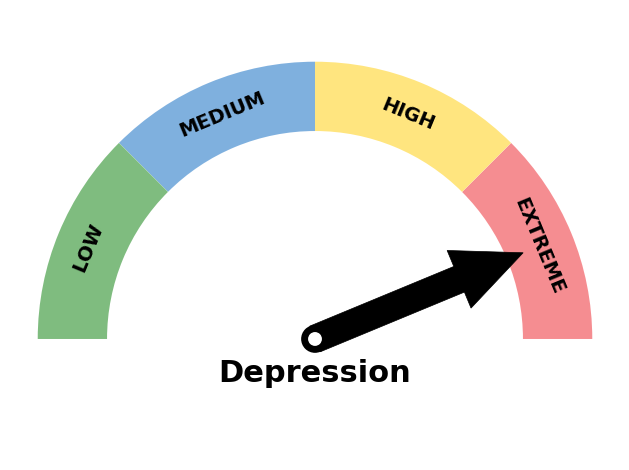

In [92]:
# Depression example prediciton

depression_example = depression_data.head(1)
customer_depression_severity = depression_example['Severity']
depression_example.drop(columns=['Severity'], inplace = True)
out = dep_svm.predict(depression_example)

plot_graph(out[0], 'Depression')

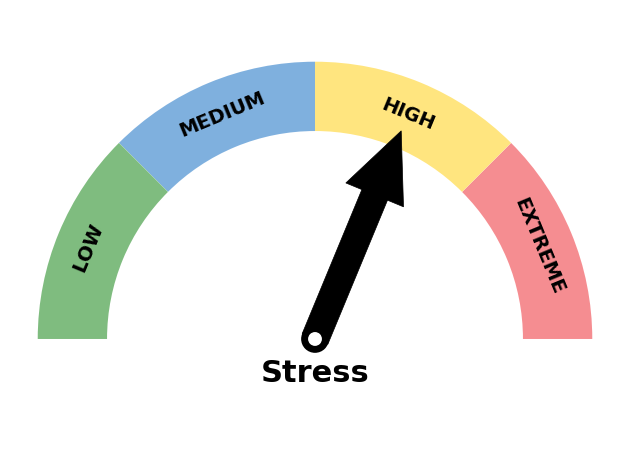

In [93]:
# Stress example predicition

stress_example = stress_data.head(1)
customer_stress_severity = stress_example['Severity']
stress_example.drop(columns=['Severity'], inplace= True)
out = st_svm.predict(stress_example)

plot_graph(out[0] , 'Stress')

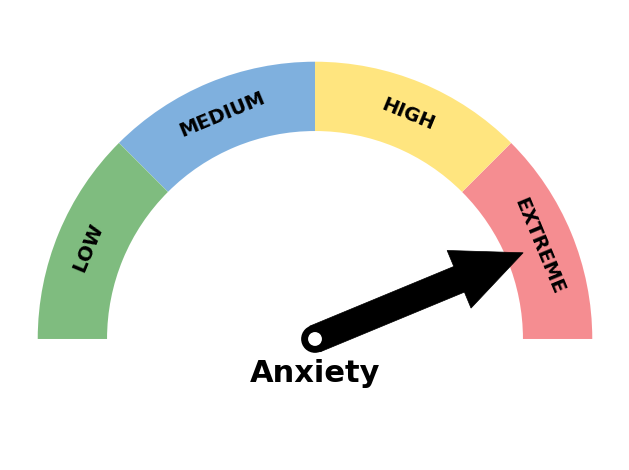

In [94]:
# Anxiety example prediction

anxiety_example = anxiety_data.head(1)
customer_anxiety_severity = anxiety_example['Severity']
anxiety_example.drop(columns=['Severity'], inplace= True)
out = anx_svm.predict(anxiety_example)

plot_graph(out[0] , 'Anxiety')

In [95]:
df['gender'].value_counts()

Female    6972
Male      4844
Name: gender, dtype: int64